# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
!pwd

/root/shared


In [3]:
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [4]:
!ls -l  ~/.kaggle/kaggle.json

-rw------- 1 root root 68 Dec 14 01:02 /root/.kaggle/kaggle.json


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
installments_payments.csv           690MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




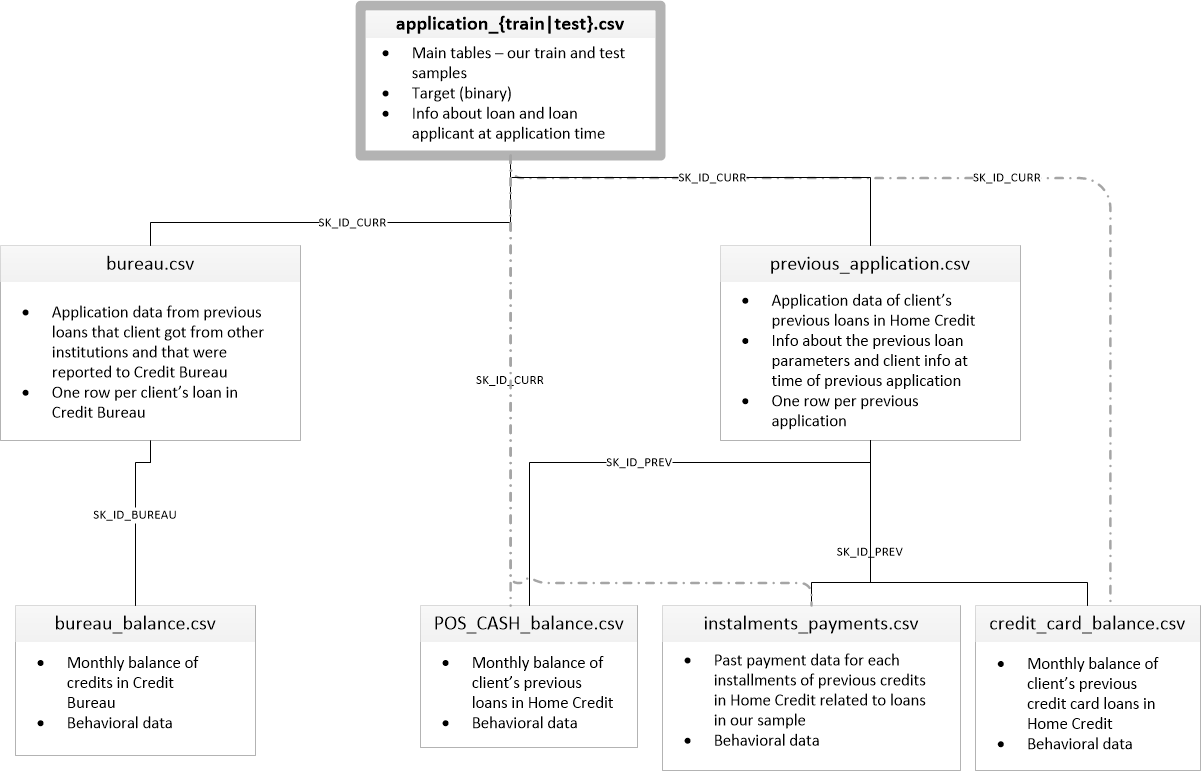

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [7]:
DATA_DIR = "/root/shared/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir -p $DATA_DIR

In [8]:
!ls -l $DATA_DIR

total 2620828
-rw-r--r-- 1 root root 392703158 Dec 11 20:33 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Dec 11 20:32 application_test.csv
-rw-r--r-- 1 root root 166133370 Dec 11 20:32 application_train.csv
-rw-r--r-- 1 root root 170016717 Dec 11 20:32 bureau.csv
-rw-r--r-- 1 root root 375592889 Dec 11 20:33 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Dec 11 20:33 credit_card_balance.csv
-rw-r--r-- 1 root root 723118349 Dec 11 20:34 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Dec 11 20:33 previous_application.csv


### Imports

In [9]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [10]:
unzippingReq = False #True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall(f'{DATA_DIR}') 
    zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

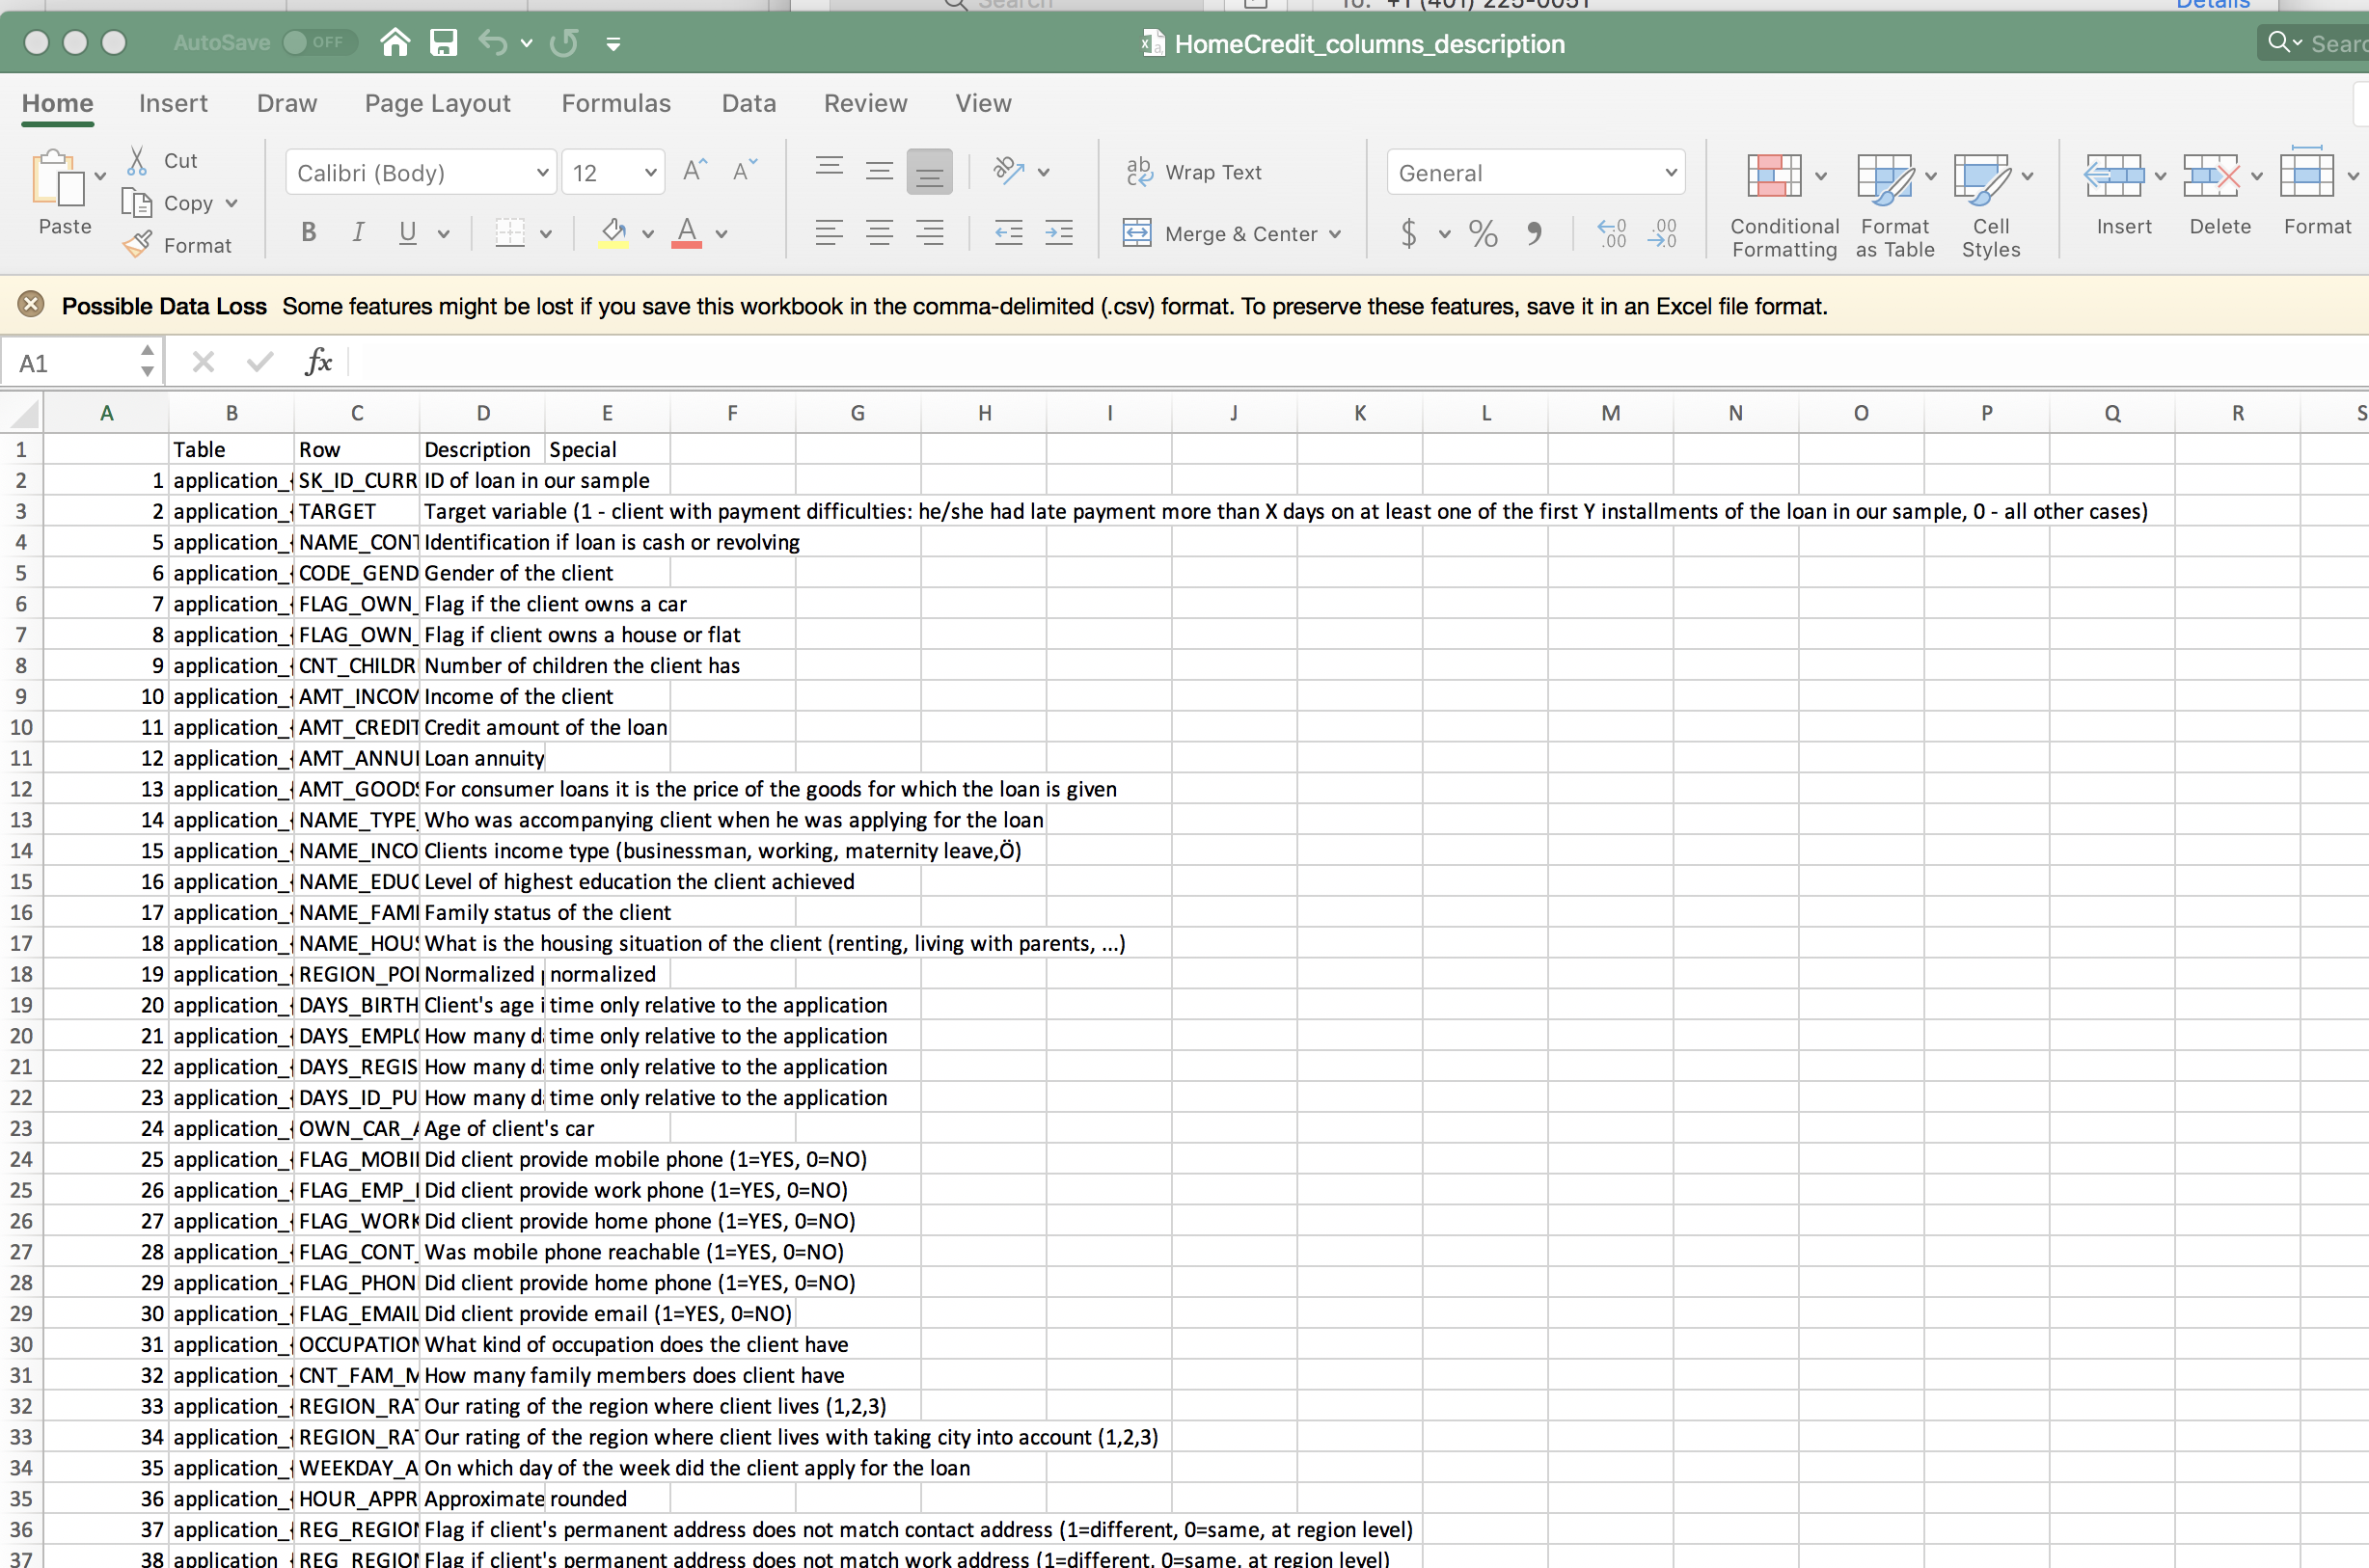

### Application train

In [11]:
ls -l /root/shared/Data/home-credit-default-risk/application_train.csv

-rw-r--r-- 1 root root 166133370 Dec 11 20:32 /root/shared/Data/home-credit-default-risk/application_train.csv


In [12]:
!pwd

/root/shared


In [13]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [14]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [15]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 1min 32s, sys: 1min 21s, total: 2min 53s
Wall time: 2min 53s


In [16]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [17]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
datasets["application_train"].shape

(307511, 122)

Total number of rows : 307511

Total number of columns : 122

In [18]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [19]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

### Missing data for application train

In [20]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

In [21]:
cols_with_null_vals = [col for col in datasets["application_train"].columns if datasets["application_train"][col].isnull().sum()>0]
print(f"Columns consisting of Null Values : {cols_with_null_vals}")

Columns consisting of Null Values : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGARE

In [163]:
missing_val_features

Count                    Features
Features                                                     
SK_ID_CURR                      0                  SK_ID_CURR
TARGET                          0                      TARGET
NAME_CONTRACT_TYPE              0          NAME_CONTRACT_TYPE
CODE_GENDER                     0                 CODE_GENDER
FLAG_OWN_CAR                    0                FLAG_OWN_CAR
...                           ...                         ...
AMT_REQ_CREDIT_BUREAU_QRT   41519   AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR  41519  AMT_REQ_CREDIT_BUREAU_YEAR
ef_INCOME_CREDIT_PERCENT        0    ef_INCOME_CREDIT_PERCENT
ef_FAM_MEMBER_INCOME            2        ef_FAM_MEMBER_INCOME
ef_ANN_INCOME_PERCENT          12       ef_ANN_INCOME_PERCENT

[125 rows x 2 columns]

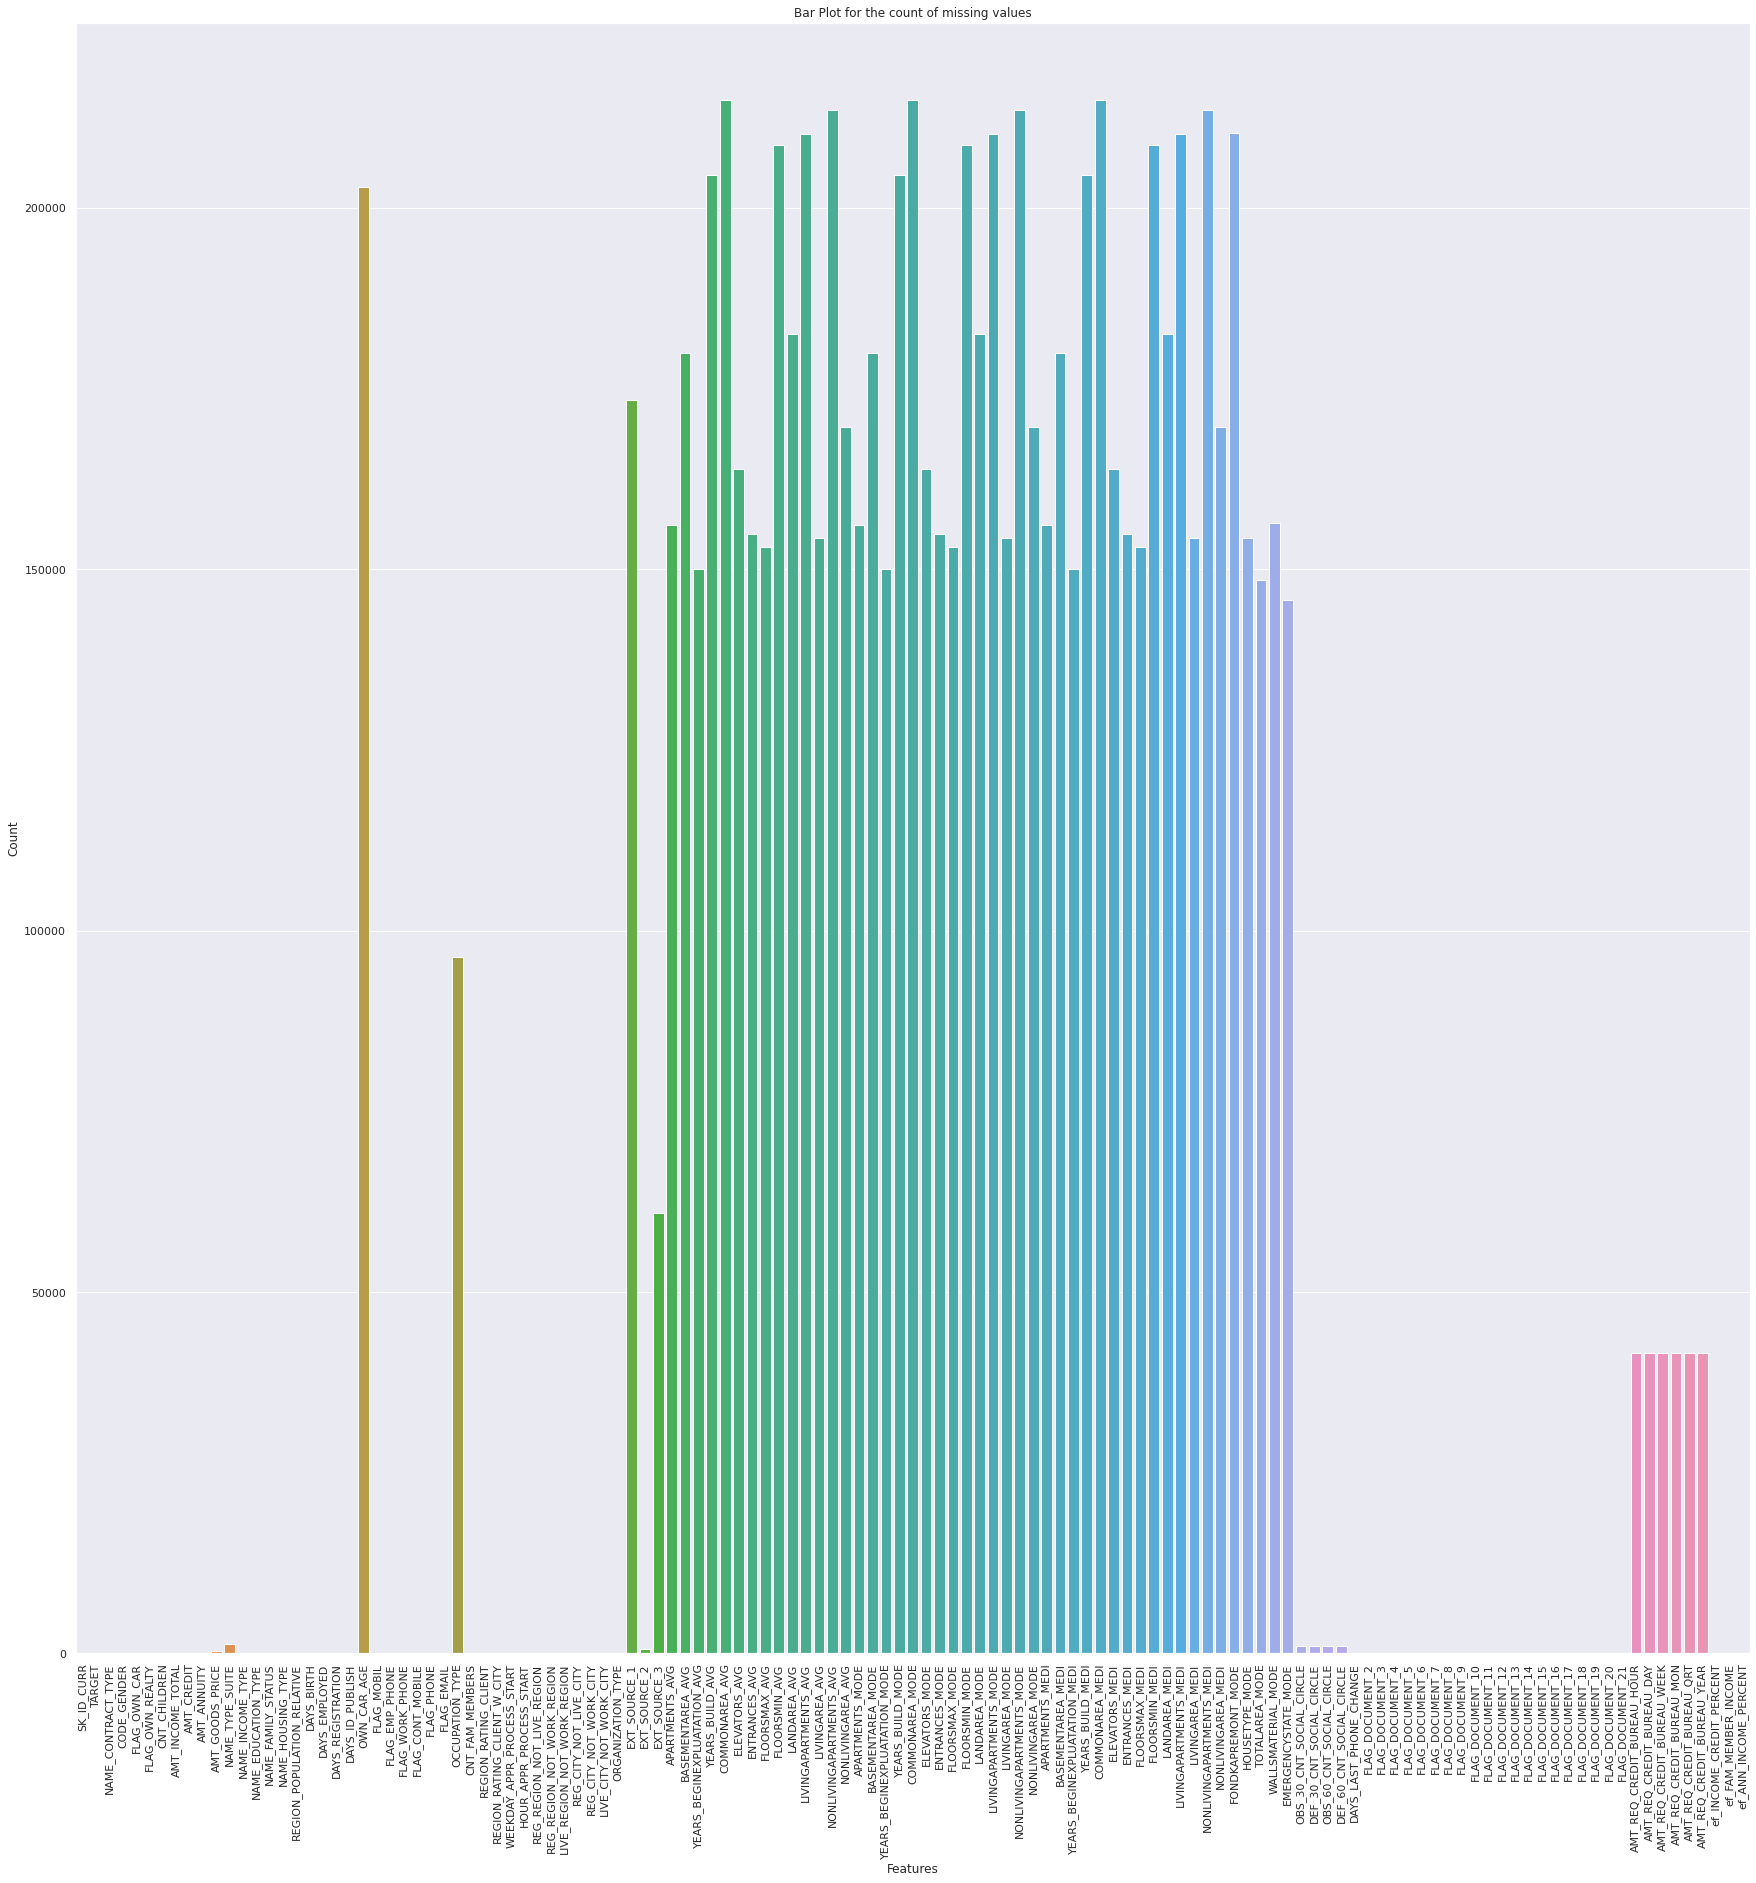

In [166]:
missing_val_features = datasets["application_train"].isnull().sum()

missing_val_features = pd.DataFrame(missing_val_features)
missing_val_features.columns = ['Count']
missing_val_features.index.names = ['Features']
missing_val_features['Features'] = missing_val_features.index

sns.set(rc={'figure.figsize':(30,30),})
sns.barplot(x ='Features' , y ='Count' , data = missing_val_features)
plt.title("Bar Plot for the count of missing values")
plt.xticks(rotation = 90)
plt.show()

#### Observation 
Above plot shows the count of null values present in each feature

### Distribution of the target column 

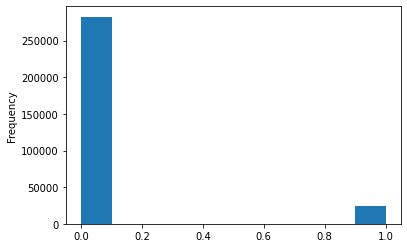

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

datasets["application_train"]['TARGET'].astype(int).plot.hist();

#### Observation
The plot demonstrates an imbalance in the distribution of the classes 

Number of customers who will not repay the loan:  24825 , ( 8 %)
Number of customers who will repay the loan:  282686 , ( 92 %)


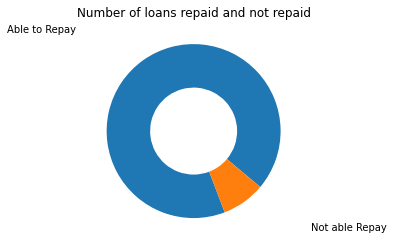

In [25]:
target_val = datasets["application_train"]['TARGET'].value_counts()
print("Number of customers who will not repay the loan: ", target_val[1], ", (",round((target_val[1]/(target_val[1]+target_val[0]))*100),"%)")
print("Number of customers who will repay the loan: ", target_val[0], ", (",round((target_val[0]/(target_val[1]+target_val[0]))*100),"%)")
fig, ax = plt.subplots(figsize=(4,4))
target = ["Able to Repay","Not able Repay"]
data = [target_val[0], target_val[1]]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),startangle=-40)
for i, p in enumerate(wedges):
    angle = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    ax.annotate(target[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment)
ax.set_title("Number of loans repaid and not repaid")
plt.show()

#### Observation
The plot demonstrates that 92% of customers repay the loan 

In [26]:
def barplot_univ(data, colum1, colum2, top=False):
    df = pd.DataFrame(data.groupby(colum1)[colum2].agg(lambda x: x.eq(1).sum())).reset_index()

    df['TOTAL'] = pd.DataFrame(datasets["application_train"].groupby(colum1)[colum2].agg(total='count')).reset_index()['total']
    df['AVERAGE'] = pd.DataFrame(datasets["application_train"].groupby(colum1)[colum2].agg(Avg='mean')).reset_index()['Avg']  
    df.sort_values(by=['TOTAL'],inplace=True, ascending=False)  
    if top:
        df = df[0:top]
        
    index = np.arange(df.shape[0])
    
    if len(df[colum1].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(df[colum1].unique())>5 & len(df[colum1].unique())<10:
        plt.figure(figsize=(6,6))
    else:
        plt.figure(figsize=(10,10))
    p1 = plt.bar(index, df['TOTAL'].values)
    p2 = plt.bar(index, df[colum2].values)

    plt.ylabel('Loans')
    plt.title('Count of loans approved vs rejected')
    plt.xticks(ticks=index,rotation=90,labels= list(df[colum1].values))
    plt.legend((p1[0], p2[0]), ('Capable to repay', 'Not Capable to repay'))
    plt.show()
    

### Based on Gender

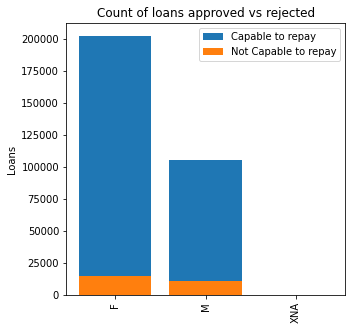

In [27]:
barplot_univ(datasets["application_train"], 'CODE_GENDER', 'TARGET', False)

#### Observations
1. We observe that Females took more loans than Males ie. Females took 200K plus loans while Males took 100K plus
2. We also observe that Males are able to repay their loans in around 10% cases while females only repay in around 7% cases.

### Based on Type of Loan

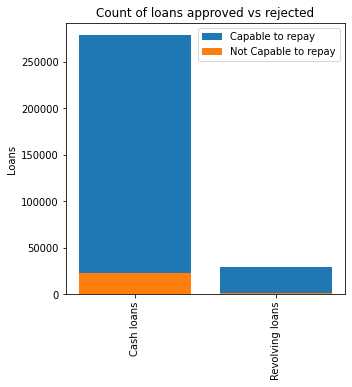

In [28]:
barplot_univ(datasets["application_train"], 'NAME_CONTRACT_TYPE', 'TARGET', False)

#### Observations

We observe that there is a preferance of cash loans in contrast to revolving loans but the capability of repayment of revolving loans is on the higher side as compared to the total cases of cash loans

### Based on Car Owner Type

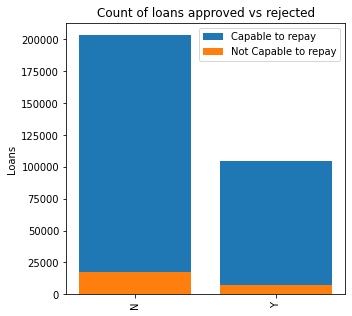

In [126]:
barplot_univ(datasets["application_train"], 'FLAG_OWN_CAR', 'TARGET', False)

#### Observations

1. We observe that applicants not having cars take more loans as compared to applicants having cars. 
2. We also observe that this feature is not helpful as it does not give a wide distinction in the loan repayment status

### Based on Realty Owner Type

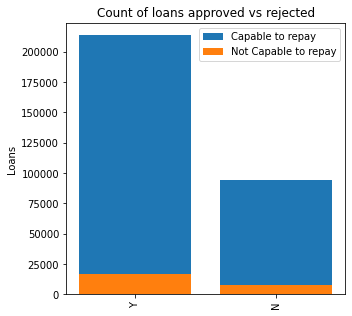

In [127]:
barplot_univ(datasets["application_train"], 'FLAG_OWN_REALTY', 'TARGET', False)

#### Observations

We observe that most of the applicants for loans own a flat/house while there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively)

### Based on Count of children

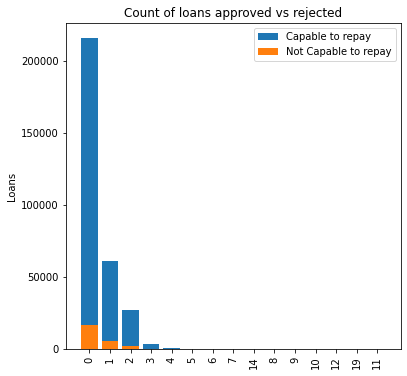

In [128]:
barplot_univ(datasets["application_train"], 'CNT_CHILDREN', 'TARGET', False)

#### Observations

We observe that the applicants having no children take considerably higher number of loans.
However, there is not much difference in the loan repayment status for the applicant based on this information

### Based on Total Income Amount

In [131]:
total_income_data = datasets["application_train"].groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean'}).reset_index()
total_income_data.head(2)

SK_ID_CURR  AMT_INCOME_TOTAL
0      100002          202500.0
1      100003          270000.0

In [132]:
total_income_data_final = pd.merge(datasets["application_train"], income_data, on='SK_ID_CURR', how='left')
income_approved = total_income_data_final[total_income_data_final['TARGET']==0]['AMT_INCOME_TOTAL_x'].values
income_rejected = total_income_data_final[total_income_data_final['TARGET']==1]['AMT_INCOME_TOTAL_x'].values

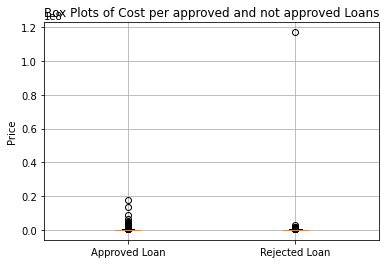

In [133]:
plt.boxplot([income_approved, income_rejected])
plt.title('Box Plots of Cost per approved and not approved Loans')
plt.xticks([1,2],('Approved Loan','Rejected Loan'))
plt.ylabel('Price')
plt.grid()
plt.show()

##### Observations
As the customer's income increases, the chances of his loan getting approved also increases.

### Based on Credit Amount

In [134]:
approved_loan_credit = datasets["application_train"][datasets["application_train"]['TARGET']==0]['AMT_CREDIT'].values
rejected_loan_credit = datasets["application_train"][datasets["application_train"]['TARGET']==1]['AMT_CREDIT'].values

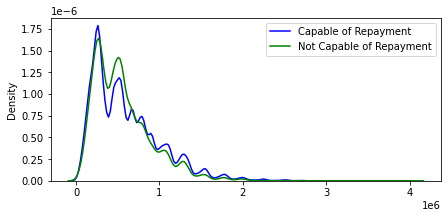

In [137]:
plt.figure(figsize=(7,3))
sns.distplot(approved_loan_credit,hist=False,label="Capable of Repayment", color='blue')
sns.distplot(rejected_loan_credit,hist=False,label="Not Capable of Repayment", color='green')
plt.legend()
plt.show()

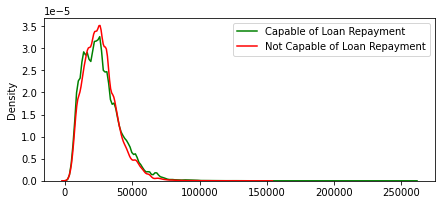

In [138]:
capable_of_loan_annuity = datasets["application_train"][datasets["application_train"]['TARGET']==0]['AMT_ANNUITY'].values
not_capable_of_loan_annuity = datasets["application_train"][datasets["application_train"]['TARGET']==1]['AMT_ANNUITY'].values
plt.figure(figsize=(7,3))
sns.distplot(capable_of_loan_annuity,hist=False,label="Capable of Loan Repayment", color='green')
sns.distplot(not_capable_of_loan_annuity,hist=False,label="Not Capable of Loan Repayment", color='red')
plt.legend()
plt.show()

#### Observations
We observe that the Credit Amount for most of the loans taken is less than 10 lakhs.

### On basis of Price of Goods for which loans are given

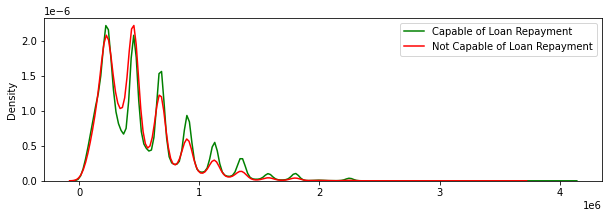

In [139]:
capable_loan_priceofgoods = datasets["application_train"][datasets["application_train"]['TARGET']==0]['AMT_GOODS_PRICE'].values
not_capable_loan_priceofgoods = datasets["application_train"][datasets["application_train"]['TARGET']==1]['AMT_GOODS_PRICE'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_loan_priceofgoods,hist=False,label="Capable of Loan Repayment", color='green')
sns.distplot(not_capable_loan_priceofgoods,hist=False,label="Not Capable of Loan Repayment", color='red')
plt.legend()
plt.show()

#### Observations

We observe that most number of loans are given for goods that are priced below Rs. 10 lakhs

### On Basis of Type of Income of Customer

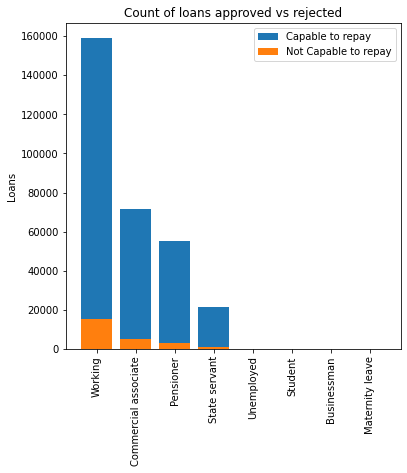

In [140]:
datasets["application_train"]['NAME_INCOME_TYPE'].unique()
datasets["application_train"]['NAME_INCOME_TYPE'].fillna('Data_Not_Available', inplace=True)
barplot_univ(datasets["application_train"], 'NAME_INCOME_TYPE', 'TARGET', False)

#### Observations

We observe that the applicant comes unaccompanied to the bank in the most number of cases, out of which approx. 92% of the time, the bank finds the applicant to be capable of loan repayment whereas the remaining 8% of the time, the applicant is not capable of the same meaning that there is a lot of variability.

### On Basis of Type of Education of Customer

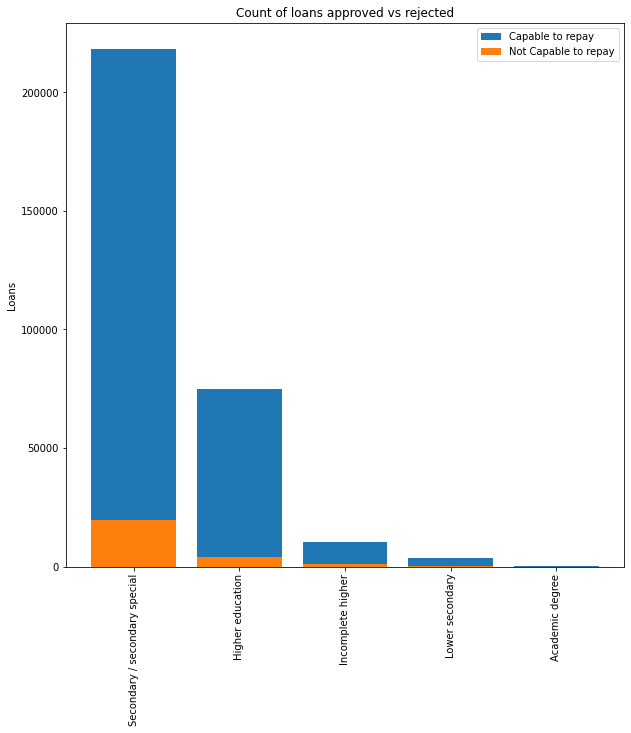

In [141]:
datasets["application_train"]['NAME_EDUCATION_TYPE'].unique()
datasets["application_train"]['NAME_EDUCATION_TYPE'].fillna('Data_Not_Available', inplace=True)
barplot_univ(datasets["application_train"], 'NAME_EDUCATION_TYPE', 'TARGET', False)

#### Observations

We observe that there's a lot of variability among education types of the applicants.
Applicants with Secondary/Secondary Special as the highest level of education apply for most number of loans and they are also the highest defaulters. However, the default percentage is not very different across various education levels.

### Based on Duration of Employment

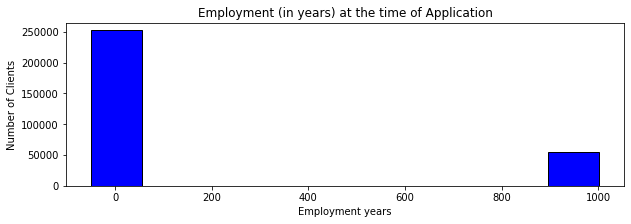

In [143]:
# convert days to years
capable_employed_dur = datasets["application_train"][datasets["application_train"]['TARGET']==0]['DAYS_EMPLOYED'].values/365
not_capable_employed_dur = datasets["application_train"][datasets["application_train"]['TARGET']==1]['DAYS_EMPLOYED'].values/365
plt.figure(figsize=(10,3))
plt.hist(datasets["application_train"]['DAYS_EMPLOYED'].values/365, bins=10, edgecolor='black', color='blue')
plt.title('Employment (in years) at the time of Application')
plt.xlabel('Employment years')
plt.ylabel('Number of Clients')
plt.show()

#### Observations
We observe from the histogram that there are some clients that have worked for 1000 years which is clearly impossible and is an outlier and we will deal it with later.

### Applicants Age 

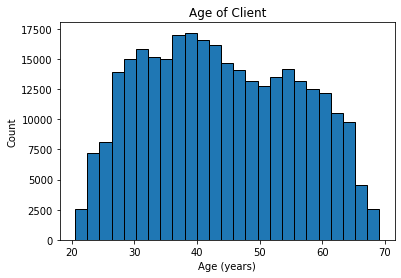

In [34]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

#### Observations
We observe that more applicants are in the range of 30-60

### Applicants occupations

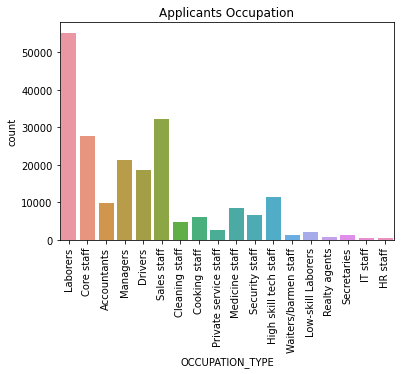

In [35]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

#### Observations

We observe that laborers have the most number of applications

### Correlation with  the target column 

In [144]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


## Summary of Bureau

In [244]:
datasets['bureau'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [245]:
datasets["bureau"].shape

(1716428, 17)

In [246]:
datasets["bureau"].describe(include='all')

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

### Missing values analysis in Bureau

In [247]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
AMT_ANNUITY               71.47              1226791
AMT_CREDIT_MAX_OVERDUE    65.51              1124488
DAYS_ENDDATE_FACT         36.92               633653
AMT_CREDIT_SUM_LIMIT      34.48               591780
AMT_CREDIT_SUM_DEBT       15.01               257669
DAYS_CREDIT_ENDDATE        6.15               105553
AMT_CREDIT_SUM             0.00                   13
CREDIT_ACTIVE              0.00                    0
CREDIT_CURRENCY            0.00                    0
DAYS_CREDIT                0.00                    0
CREDIT_DAY_OVERDUE         0.00                    0
SK_ID_BUREAU               0.00                    0
CNT_CREDIT_PROLONG         0.00                    0
AMT_CREDIT_SUM_OVERDUE     0.00                    0
CREDIT_TYPE                0.00                    0
DAYS_CREDIT_UPDATE         0.00                    0
SK_ID_CURR                 0.00                    0

In [248]:
cols_with_null_vals = [col for col in datasets["bureau"].columns if datasets["bureau"][col].isnull().sum()>0]
print(f"Columns consisting of Null Values : {cols_with_null_vals}")

Columns consisting of Null Values : ['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']


### Based on Credit_Active Distribution

In [249]:
from collections import Counter
credit_active_counter = Counter()
for word in datasets["bureau"]['CREDIT_ACTIVE'].values:
    credit_active_counter.update(word.split(','))

print(credit_active_counter)

Counter({'Closed': 1079273, 'Active': 630607, 'Sold': 6527, 'Bad debt': 21})


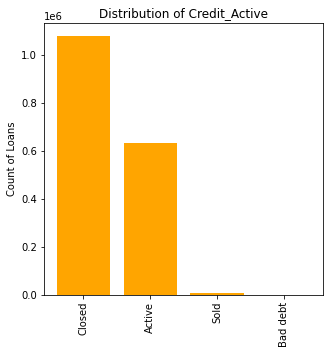

In [250]:
status_dict = dict(credit_active_counter)
sorted_status_dict = dict(sorted(status_dict.items(), key=lambda kv: kv[1], reverse=True))


ind = np.arange(len(sorted_status_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind, list(sorted_status_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Credit_Active')
plt.xticks(ind, list(sorted_status_dict.keys()),rotation=90)
plt.show()

#### Observations

We observe that the credit active staus of most applicants are closed followed by Active while only a few in the sold and bad debt category

### Based on Days_Credit

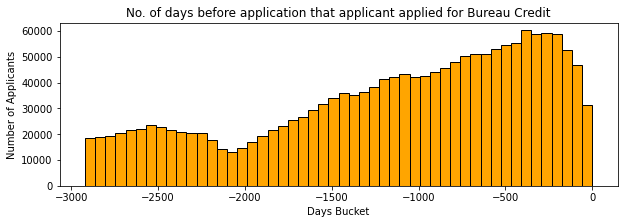

In [251]:
plt.figure(figsize=(10,3))
plt.hist(datasets["bureau"]['DAYS_CREDIT'].values, bins=50, edgecolor='black', color='orange')
plt.title('No. of days before application that applicant applied for Bureau Credit')
plt.xlabel('Days Bucket')
plt.ylabel('Number of Applicants')
plt.show()

#### Observations

We observe that applicants applied less than 500 days before the date of loan application for the Bureau Credit

### Based on Credit_Currency

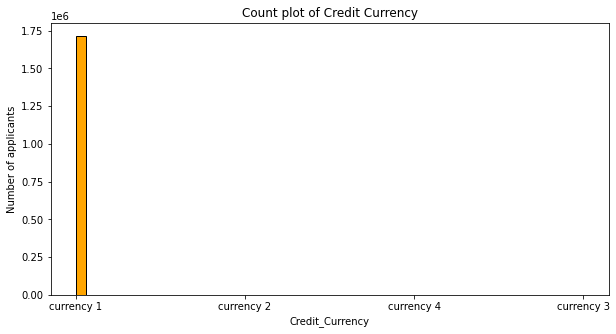

In [252]:
plt.figure(figsize=(10,5))
plt.hist(datasets["bureau"]['CREDIT_CURRENCY'].values, bins=50, edgecolor='black', color='orange')
plt.title('Count plot of Credit Currency')
plt.xlabel('Credit_Currency')
plt.ylabel('Number of applicants')
plt.show()

#### Observations
We observe that only currency 1 is being used as the credit currency

### Based on Credit_Type

In [253]:
credit_type_counter = Counter()
for type in datasets["bureau"]['CREDIT_TYPE'].values:
    credit_type_counter.update(type.split(','))

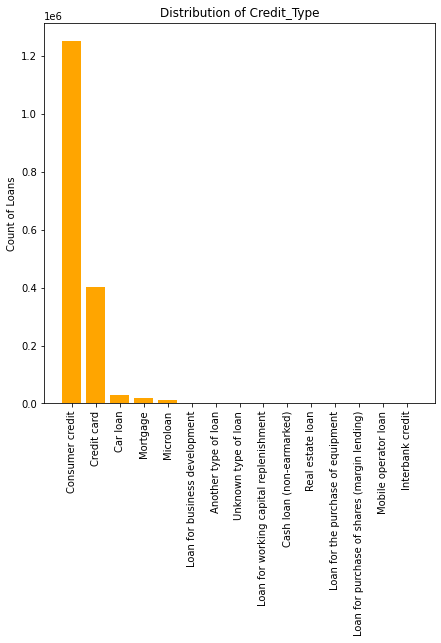

In [254]:
type_dict = dict(credit_type_counter)
sorted_type_dict = dict(sorted(type_dict.items(), key=lambda kv: kv[1], reverse=True))

ind_2 = np.arange(len(sorted_type_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_2, list(sorted_type_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Credit_Type')
plt.xticks(ind_2, list(sorted_type_dict.keys()),rotation=90)
plt.show()

#### Observations

We observe that amongst all types, Consumer credit and Credit Card are the most registered with less loans registered based on car loan, mortgage and microloan

### Based on Credit_Active vs Days_Credit

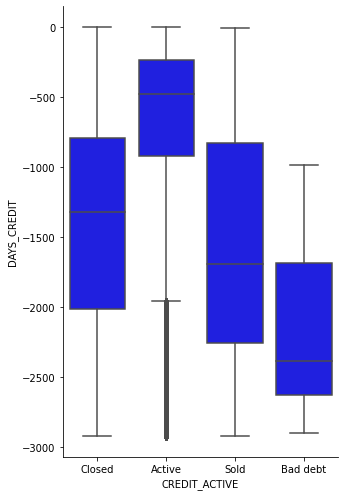

In [255]:
sns.catplot(x="CREDIT_ACTIVE", y="DAYS_CREDIT",\
            data=datasets["bureau"],color = "blue",kind="box", height=7, aspect=.7);

#### Observation
We observe that when the Credit Status is Active, the median value is around 500 days for the number of days before application

## Summary of Bureau Balance

In [256]:
datasets['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [257]:
datasets["bureau_balance"].shape

(27299925, 3)

In [258]:
datasets["bureau_balance"].describe(include='all')

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   2.729992e+07    2.729992e+07  27299925
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN  13646993
mean    6.036297e+06   -3.074169e+01       NaN
std     4.923489e+05    2.386451e+01       NaN
min     5.001709e+06   -9.600000e+01       NaN
25%     5.730933e+06   -4.600000e+01       NaN
50%     6.070821e+06   -2.500000e+01       NaN
75%     6.431951e+06   -1.100000e+01       NaN
max     6.842888e+06    0.000000e+00       NaN

### Missing values in Bureau Balance

In [259]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
SK_ID_BUREAU        0.0                    0
MONTHS_BALANCE      0.0                    0
STATUS              0.0                    0

### Based on Status

In [260]:
bureau_status_counter = Counter()
for status in datasets["bureau_balance"]['STATUS'].values:
    bureau_status_counter.update(status.split(','))

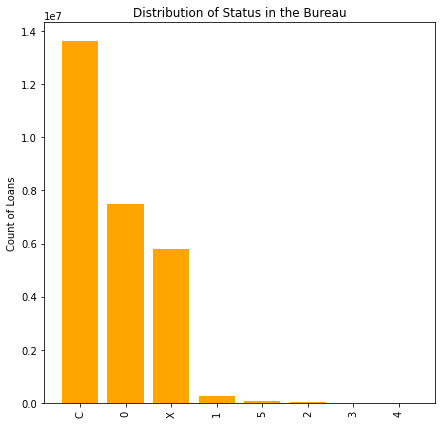

In [261]:
status_dict = dict(bureau_status_counter)
sorted_status_dict = dict(sorted(status_dict.items(), key=lambda kv: kv[1], reverse=True))


ind_3 = np.arange(len(sorted_status_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_3, list(sorted_status_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Status in the Bureau')
plt.xticks(ind_3, list(sorted_status_dict.keys()),rotation=90)
plt.show()

#### Observations
We observe that most of the loans are Closed in the Credit Bureau, which is followed by applicantss with 0 DPD and then by applicants whose status is unknown.
We can say that there are very few annuity defaulters in the data.

## Summary of Credit_card_balance

In [262]:
datasets['credit_card_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [263]:
datasets["credit_card_balance"].shape

(3840312, 23)

In [264]:
datasets["credit_card_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std     5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%     1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%     1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%     2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              3.840312e+06              3.090496e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.538080e+05              5.961325e+03   
std                1.651457e+05              2.822569e+04   
min                0.000000e+00             -6.827310e+03   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              2.115000e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           3.840312e+06                3.090496e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.433388e+03                2.881696e+02   
std             3.384608e+04                8.201989e+03   
min            -6.211620e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.529847e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  \
count               3.090496e+06             3.535076e+06  ...   3.840312e+06   
unique                       NaN                      NaN  ...            NaN   
top                          NaN                      NaN  ...            NaN   
freq                         NaN                      NaN  ...            NaN   
mean                2.968805e+03             3.540204e+03  ...   5.808881e+04   
std                 2.079689e+04             5.600154e+03  ...   1.059654e+05   
min                 0.000000e+00             0.000000e+00  ...  -4.202502e+05   
25%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
50%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
75%                 0.000000e+00             6.633911e+03  ...   8.889949e+04   
max                 2.239274e+06             2.028820e+05  ...   1.493338e+06   

        AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count           3.840312e+06              3.090496e+06          3.840312e+06   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean            5.809829e+04              3.094490e-01          7.031439e-01   
std             1.059718e+05              1.100401e+00          3.190347e+00   
min            -4.202502e+05              0.000000e+00          0.000000e+00   
25%             0.000000e+00              0.000000e+00          0.000000e+00   
50%             0.000000e+00              0.00

### Missing values in credit card balance

In [265]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
AMT_PAYMENT_CURRENT           20.00               767988
AMT_DRAWINGS_ATM_CURRENT      19.52               749816
CNT_DRAWINGS_POS_CURRENT      19.52               749816
AMT_DRAWINGS_OTHER_CURRENT    19.52               749816
AMT_DRAWINGS_POS_CURRENT      19.52               749816
CNT_DRAWINGS_OTHER_CURRENT    19.52               749816
CNT_DRAWINGS_ATM_CURRENT      19.52               749816
CNT_INSTALMENT_MATURE_CUM      7.95               305236
AMT_INST_MIN_REGULARITY        7.95               305236
SK_ID_PREV                     0.00                    0
AMT_TOTAL_RECEIVABLE           0.00                    0
SK_DPD                         0.00                    0
NAME_CONTRACT_STATUS           0.00                    0
CNT_DRAWINGS_CURRENT           0.00                    0
AMT_PAYMENT_TOTAL_CURRENT      0.00                    0
AMT_RECIVABLE                  0.00                    0
AMT_RECEIVABLE_PRINCIPAL       0.00                    0
SK_ID_CURR                     0.00                    0
AMT_DRAWINGS_CURRENT           0.00                    0
AMT_CREDIT_LIMIT_ACTUAL        0.00                    0

### Based on Months_Balance

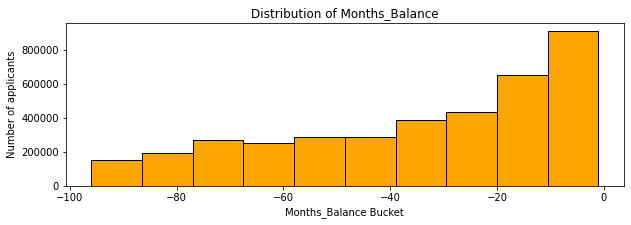

In [267]:
plt.figure(figsize=(10,3))
plt.hist(datasets["credit_card_balance"]['MONTHS_BALANCE'].values, bins=10, edgecolor='black',\
         color='orange')
plt.title('Distribution of Months_Balance')
plt.xlabel('Months_Balance Bucket')
plt.ylabel('Number of applicants')
plt.show()

### Observations

We observe that most applicants have Months_Balance between 0-10 months before the application date

### Based on Cnt_Drawings_Current

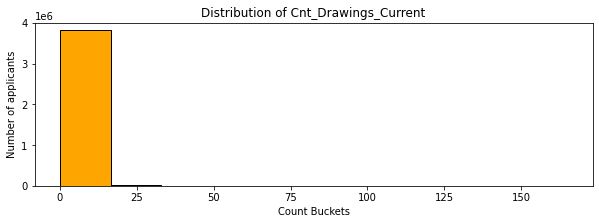

In [269]:
plt.figure(figsize=(10,3))
plt.hist(datasets["credit_card_balance"]['CNT_DRAWINGS_CURRENT'].values, bins=10, edgecolor='black',\
         color='orange')
plt.title('Distribution of Cnt_Drawings_Current')
plt.xlabel('Count Buckets')
plt.ylabel('Number of applicants')
plt.show()

#### Observations

We observe that majority applicants have less than 25 months of drawing in the current month on the previous credit with few outliers

### Based on Cnt_Instalment_Mature_Cum

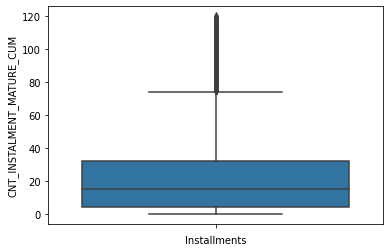

In [270]:
sns.boxplot(y='CNT_INSTALMENT_MATURE_CUM', data=datasets["credit_card_balance"])
plt.xlabel('Installments')
plt.show()

In [271]:
datasets["credit_card_balance"]['CNT_INSTALMENT_MATURE_CUM'].describe()

count    3.535076e+06
mean     2.082508e+01
std      2.005149e+01
min      0.000000e+00
25%      4.000000e+00
50%      1.500000e+01
75%      3.200000e+01
max      1.200000e+02
Name: CNT_INSTALMENT_MATURE_CUM, dtype: float64

### Observations
We observe from the Boxplot and the detailed Feature Description of 'Cnt_Instalment_Mature_Cum' (number of paid instalments on the previous credit), the minimum value is 0 whereas the maximum value is 120.
We also observe that 75% of the total values lying are less than 32.

## Summary of Installments_payments

In [272]:
datasets['installments_payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [273]:
datasets["installments_payments"].shape

(13605401, 8)

In [274]:
datasets["installments_payments"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

### Missing values in installments payments

In [275]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
DAYS_ENTRY_PAYMENT         0.02                 2905
AMT_PAYMENT                0.02                 2905
SK_ID_PREV                 0.00                    0
SK_ID_CURR                 0.00                    0
NUM_INSTALMENT_VERSION     0.00                    0
NUM_INSTALMENT_NUMBER      0.00                    0
DAYS_INSTALMENT            0.00                    0
AMT_INSTALMENT             0.00                    0

### Based on Num_Instalment_Number

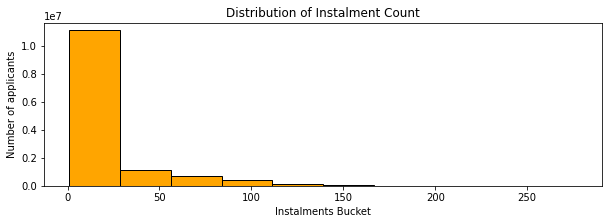

In [276]:
plt.figure(figsize=(10,3))
plt.hist(datasets["installments_payments"]['NUM_INSTALMENT_NUMBER'].values, bins=10, edgecolor='black',\
         color='orange')
plt.title('Distribution of Instalment Count')
plt.xlabel('Instalments Bucket')
plt.ylabel('Number of applicants')
plt.show()

### Observation
We observe that most of the applicants complete their instalment payment before 25 months

### Based on Amt_Payment

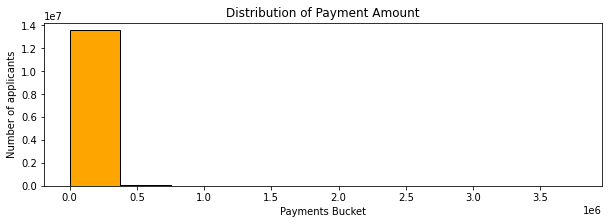

In [278]:
plt.figure(figsize=(10,3))
plt.hist(datasets["installments_payments"]['AMT_PAYMENT'].values, bins=10, edgecolor='black',\
         color='orange')
plt.title('Distribution of Payment Amount')
plt.xlabel('Payments Bucket')
plt.ylabel('Number of applicants')
plt.show()

### Observations:
We observe that most of the applicants paid less than 5 lakh on previous credit on the same installment

## Summary of POS Cash Balance

In [279]:
datasets['POS_CASH_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [280]:
datasets["POS_CASH_balance"].shape

(10001358, 8)

In [281]:
datasets["POS_CASH_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count   1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
unique           NaN           NaN             NaN             NaN   
top              NaN           NaN             NaN             NaN   
freq             NaN           NaN             NaN             NaN   
mean    1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std     5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min     1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%     1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%     1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%     2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max     2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

        CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS        SK_DPD    SK_DPD_DEF  
count            9.975271e+06             10001358  1.000136e+07  1.000136e+07  
unique                    NaN                    9           NaN           NaN  
top                       NaN               Active           NaN           NaN  
freq                      NaN              9151119           NaN           NaN  
mean             1.048384e+01                  NaN  1.160693e+01  6.544684e-01  
std              1.110906e+01                  NaN  1.327140e+02  3.276249e+01  
min              0.000000e+00                  NaN  0.000000e+00  0.000000e+00  
25%              3.000000e+00                  NaN  0.000000e+00  0.000000e+00  
50%              7.000000e+00                  NaN  0.000000e+00  0.000000e+00  
75%              1.400000e+01                  NaN  0.000000e+00  0.000000e+00  
max              8.500000e+01                  NaN  4.231000e+03  3.595000e+03

### Missing values in POSH Cash Balance

In [282]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
CNT_INSTALMENT_FUTURE     0.26                26087
CNT_INSTALMENT            0.26                26071
SK_ID_PREV                0.00                    0
SK_ID_CURR                0.00                    0
MONTHS_BALANCE            0.00                    0
NAME_CONTRACT_STATUS      0.00                    0
SK_DPD                    0.00                    0
SK_DPD_DEF                0.00                    0

### Based on Months_Balance

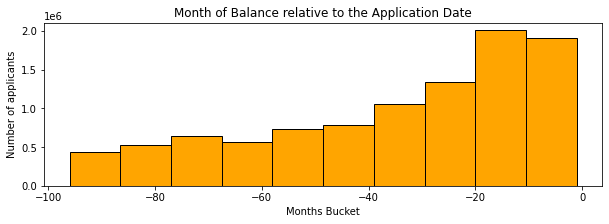

In [283]:
plt.figure(figsize=(10,3))
plt.hist(datasets["POS_CASH_balance"]['MONTHS_BALANCE'].values, bins=10, edgecolor='black', color='orange')
plt.title('Month of Balance relative to the Application Date')
plt.xlabel('Months Bucket')
plt.ylabel('Number of applicants')
plt.show()

#### Observations

We observe that the Months_Balance for a large number of the applicants is between 10 and 20 months before the date of application followed by applications with Months_Balance less than 10 months

### Based on Cnt_Instalment

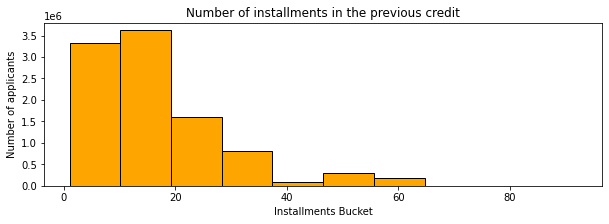

In [284]:
plt.figure(figsize=(10,3))
plt.hist(datasets["POS_CASH_balance"]['CNT_INSTALMENT'].values, bins=10, edgecolor='black', color='orange')
plt.title('Number of installments in the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of applicants')
plt.show()

#### Observations

We observe that the number of installments in the previous credit for most clients lies between 10 and 20

### Based on Cnt_Instalment_Future

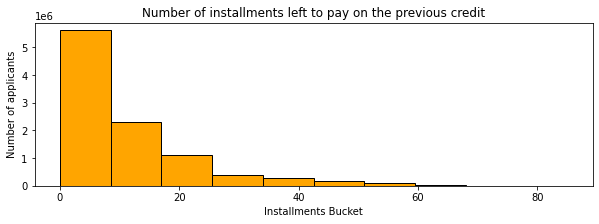

In [285]:
plt.figure(figsize=(10,3))
plt.hist(datasets["POS_CASH_balance"]['CNT_INSTALMENT_FUTURE'].values, bins=10, edgecolor='black', color='orange')
plt.title('Number of installments left to pay on the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of applicants')
plt.show()

### Observations

We observe that most of the clients have less than 10 installments left to pay on the previous credit followed by clients whose installment count is between 10 and 20

## Summary of Previous Application

In [286]:
datasets['previous_application'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [287]:
datasets['previous_application'].shape

(1670214, 37)

In [288]:
datasets['previous_application'].describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
count                     1670214             1.670214e+06  ...   
unique                          7                      NaN  ...   
top                       TUESDAY                      NaN  ...   
freq                       255118                      NaN  ...   
mean                          NaN             1.248418e+01  ...   
std                           NaN             3.334028e+00  ...   
min                           NaN             0.000000e+00  ...   
25%                           NaN             1.000000e+01  ...   
50%                           NaN             1.200000e+01  ...   
75%                           NaN             1.500000e+01  ...   
max                           NaN             2.300000e+01  ...   

       NAME_SELLER_INDUSTRY   CNT_PAYMENT  NAME_YIELD_GROUP  \
count               1670214  1.297984e+06           1670214   
unique                   11           NaN                 5   
top                     XNA           NaN               XNA   
freq                 855720           NaN            517215   
mean                    NaN  1.605408e+01               NaN   
std                     NaN  1.456729e+01               NaN   
min                     NaN  0.000000e+00               NaN   
25%                     NaN  6.000000e+00               NaN   
50%                     NaN  1.200000e+01               NaN   
75%                     NaN  2.400000e+01               NaN   
max                     NaN  8.400000e+01               NaN   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
count               1669868       997149.000000  997149.000000   
unique                   17                 NaN            NaN   
top                    Cash                 NaN            NaN   
freq                 285990                 NaN            NaN   
mean                    NaN       342209.855039   13826.269337   
std                     NaN        88916.115833   72444.869708   
min                     NaN        -2922.000000   -2892.000000   
25%                     NaN       365243.000000   -1628.000000   
50%                     NaN       365243.000000    -831.000000   
75%                   

### Missing values in Previous Application

In [289]:
percent = (datasets['previous_application'].isnull().sum()/datasets['previous_application'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['previous_application'].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
RATE_INTEREST_PRIVILEGED     99.64              1664263
RATE_INTEREST_PRIMARY        99.64              1664263
AMT_DOWN_PAYMENT             53.64               895844
RATE_DOWN_PAYMENT            53.64               895844
NAME_TYPE_SUITE              49.12               820405
NFLAG_INSURED_ON_APPROVAL    40.30               673065
DAYS_TERMINATION             40.30               673065
DAYS_LAST_DUE                40.30               673065
DAYS_LAST_DUE_1ST_VERSION    40.30               673065
DAYS_FIRST_DUE               40.30               673065
DAYS_FIRST_DRAWING           40.30               673065
AMT_GOODS_PRICE              23.08               385515
AMT_ANNUITY                  22.29               372235
CNT_PAYMENT                  22.29               372230
PRODUCT_COMBINATION           0.02                  346
AMT_CREDIT                    0.00                    1
NAME_YIELD_GROUP              0.00                    0
NAME_PORTFOLIO                0.00                    0
NAME_SELLER_INDUSTRY          0.00                    0
SELLERPLACE_AREA              0.00                    0

### Based on Name_Contract_Status

In [290]:
application_contract_status = Counter()
for status in datasets['previous_application']['NAME_CONTRACT_STATUS'].values:
    application_contract_status.update(status.split(','))

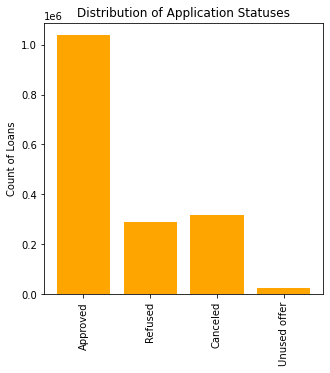

In [291]:
contract_status_dict = dict(application_contract_status)
sorted_contract_status_dict = dict(sorted(contract_status_dict.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_5 = np.arange(len(contract_status_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_5, list(contract_status_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Application Statuses')
plt.xticks(ind_5, list(contract_status_dict.keys()),rotation=90)
plt.show()

### Observations

We observe that most of the previous applications for the clients were approved

### Based on Name_Payment_Type

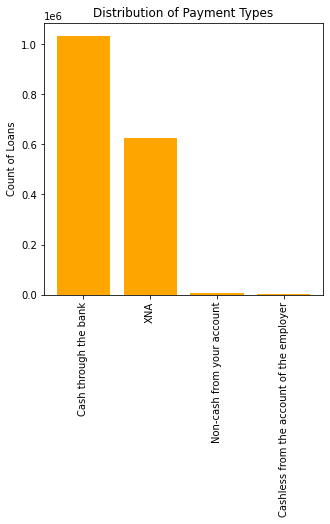

In [292]:
application_payment_type = Counter()
for type in datasets['previous_application']['NAME_PAYMENT_TYPE'].values:
    application_payment_type.update(type.split(','))

payment_type_dict = dict(application_payment_type)
sorted_payment_type_dict = dict(sorted(payment_type_dict.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_6 = np.arange(len(payment_type_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_6, list(payment_type_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Payment Types')
plt.xticks(ind_6, list(payment_type_dict.keys()),rotation=90)
plt.show()

### Observations

We observe that most of the applicants chose to pay via Cash through the Bank

### Based on Name_Client_Type

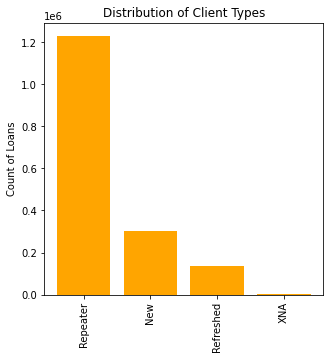

In [293]:
application_client_type = Counter()
for type in datasets['previous_application']['NAME_CLIENT_TYPE'].values:
    application_client_type.update(type.split(','))

client_type_dict = dict(application_client_type)
sorted_client_type_dict = dict(sorted(client_type_dict.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_8 = np.arange(len(client_type_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_8, list(client_type_dict.values()),color='orange')

plt.ylabel('Count of Loans')
plt.title('Distribution of Client Types')
plt.xticks(ind_8, list(client_type_dict.keys()),rotation=90)
plt.show()


### Observations

We observe that most of the applicants for the previous application were repeaters and there were very few first time applicants.

## Metrics Used

The performance metrics we will be using are as follows:

#### 1. Confusion Matrix
This gives an overall visual representation of the predictions made on a particular class by a model. It also shows the correct classifications as well as the misclassifications made by the model.

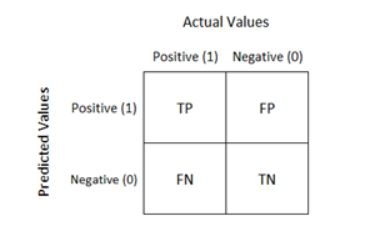

### 2. F1 Score
The F1 score is a metric that has a value of 0 - 1, with 1 being the best value. The F1 score is a weighted average of the precision and recall, with the contributions of precision and recall are the same

$$\dfrac{2*Precision*Recall}{Precision + Recall}$$

a. Precision
The precision is the ratio of true positives over the total number of predicted positives.

$$ \dfrac{TP}{TP + FP} $$
b. Recall  
The recall is the ratio of true positives over the true positives and false negatives. Recall is assessing the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0 

$$ \dfrac{TP}{TP + FN} $$

#### 3. Accuracy Score
This metric describes the fraction of correctly classified samples. In SKLearn, it can be modified to return solely the number of correct samples.Accuracy is the default scoring method for both logistic regression and k-Nearest Neighbors in scikit-learn.


$$ \text{accuracy}(y,\hat{y}) = \dfrac{1}{n_{samples}}\sum\limits_{i=1}^{n_{samples}-1}1(\hat{y} = y_{i}) $$

#### 4. ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: ▪ True Positive Rate ▪ False Positive Rate

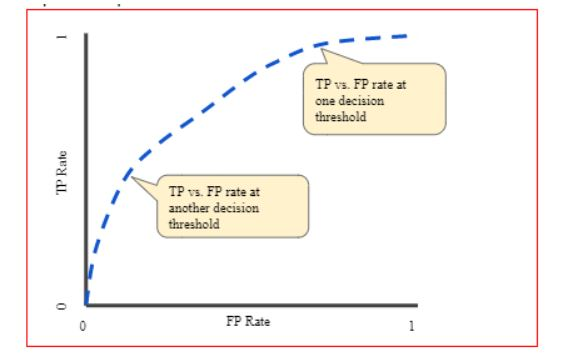

### 5. Binomial Cross Entropy/Log Loss function 
CXE measures the performance of a classification model whose output is a probability value between 0 and 1. CXE increases as the predicted probability diverges from the actual label. Therefore, we choose a parameter, which would minimize the binary CXE loss function.

$$
\underset{\mathbf{\theta}}{\operatorname{argmin}}\left[\text{BXE}\right] = \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} \right] $$

* where probability of class 1: | $\hat{p}=\mathbb{P}(y=1|X)  =\sigma(X\cdot w+b) =  \hat{p} = \sigma(t) = \dfrac{1}{1 + \exp(-t)} $


### 6. Loss Function
$$
\underset{\mathbf{\theta}}{\operatorname{argmin}}\left[\text{BXE}\right] = \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} \right] $$

* where probability of class 1: | $\hat{p}=\mathbb{P}(y=1|X)  =\sigma(X\cdot w+b) =  \hat{p} = \sigma(t) = \dfrac{1}{1 + \exp(-t)} $

# Dataset questions
## Unique record for each SK_ID_CURR

In [32]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [33]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [34]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [35]:
# 
datasets["application_test"].shape

(48744, 121)

In [36]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [19]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [20]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [21]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [22]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


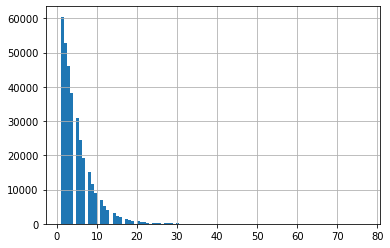

In [23]:
# How many previous applciations  per applicant in the previous_application 
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

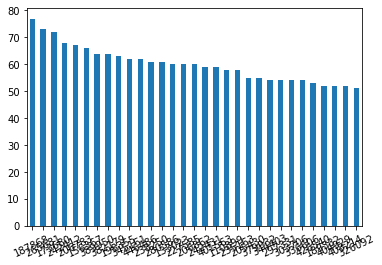

In [38]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [39]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

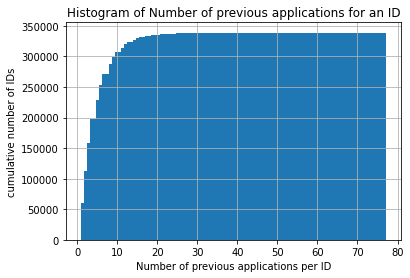

In [40]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')

##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [24]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [30]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [31]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [32]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps

In [33]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [34]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [ ]:
# appsDF[agg_op_features].head()

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [35]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR    SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001  1.369693e+06     3951.000         24835.50    23787.00   
1      100002  1.038818e+06     9251.775        179055.00   179055.00   
2      100003  2.281150e+06    56553.990        435436.50   484191.00   
3      100004  1.564014e+06     5357.250         24282.00    20106.00   
4      100005  2.176837e+06     4813.200         22308.75    20076.75   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0            2520.0          24835.5                13.000000   
1               0.0         179055.0                 9.000000   
2            3442.5         435436.5                14.666667   
3            4860.0          24282.0                 5.000000   
4            4464.0          44617.5                10.500000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                     1.0           0.104326  ...                       NaN   
1                     1.0           0.000000  ...                       NaN   
2                     1.0           0.050030  ...                       NaN   
3                     1.0           0.212008  ...                       NaN   
4                     1.0           0.108964  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0        -1740.0              23.0          8.0            365243.0   
1         -606.0             500.0         24.0            365243.0   
2        -1305.0             533.0         10.0            365243.0   
3         -815.0              30.0          4.0            365243.0   
4         -536.0              18.0         12.0            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0    -1709.000000               -1499.000000   -1619.000000      -1612.000000   
1     -565.000000                 125.000000     -25.000000        -17.000000   
2    -1274.333333               -1004.333333   -1054.333333      -1047.333333   
3     -784.000000                -694.000000    -724.000000       -714.000000   
4     -706.000000                -376.000000    -466.000000       -460.000000   

   NFLAG_INSURED_ON_APPROVAL  
0                   0.000000  
1                   0.000000  
2                   0.666667  
3                   0.000000  
4                   0.000000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                   24835.5              24835.5             24835.500  
1                  179055.0             179055.0            179055.000  
2                   68809.5             900000.0            435436.500  
3                   24282.0              24282.0             24282.000  
4                       0.0              44617.5             22308.750  
...                     ...                  ...                   ...  
338852              40455.0              40455.0             40455.000  
338853              57595.5              57595.5             57595.500  
338854              19413.0              28912.5             24162.750  
338855              18846.0             223789.5            121317.750  
338856              45000.0            1170000.0            362770.875  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010        27463.410        27463.410      27463.410000   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0              24835.5              24835.5          24835.500000   
1             179055.0             179055.0         179055.000000   
2              68809.5             900000.0         435436.500000   
3              24282.0              24282.0          24282.000000   
4                  0.0              44617.5          22308.750000   
5                  0.0             688500.0         272203.260000   
6              17176.5             247500.0         150530.250000   
7                  0.0             450000.0         155701.800000   
8              40455.0             110160.0          76741.714286   
9             247212.0             247212.0         247212.000000   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [36]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

## feature transformer for prevApp table

In [37]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
#             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] =  ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
#         result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]

        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

### Feature Engineering for Primary & Secondary Tables

Choosing Highly correlated features from all input datasets

In [38]:
def correlation_target_data(df_name):
    f1 = datasets["application_train"].copy()
    f2 = datasets[df_name].copy()
    corr_matrix =  pd.concat([f1.TARGET, f2], axis=1).corr().filter(f2.columns).filter(f1.columns, axis=0)
    return corr_matrix

In [39]:
df_name = "previous_application"
corr_matr = correlation_target_data(df_name)
print(f"Correlation of the {df_name} against the target is :")
corr_matr.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

In [40]:
df_name = "bureau"
correlation_matrix = correlation_target_data(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

In [41]:
df_name = "bureau_balance"
correlation_matrix = correlation_target_data(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [42]:
df_name = "credit_card_balance"
correlation_matrix = correlation_target_data(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

In [43]:
df_name = "POS_CASH_balance"
correlation_matrix = correlation_target_data(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance against the Target is :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD                   0.000050
SK_ID_CURR              -0.000136
SK_DPD_DEF              -0.001362
Name: TARGET, dtype: float64

In [44]:
agg_funcs = ['min', 'max', 'mean', 'count', 'sum']

prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION']

bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM']

bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']

cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM']

installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT']

pos_bal = datasets['POS_CASH_balance']
pos_bal_features = ['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']


### Feature Aggregator

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result

In [46]:
class features_engineering(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)
    
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)
    
        X['ef_ANN_IqNCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

        return X

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

prevApps_feature_pipeline = Pipeline([
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_bal_features_pipeline = Pipeline([
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

cc_bal_features_pipeline = Pipeline([
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

installments_pmnts_features_pipeline = Pipeline([
    ('installments_pmnts_features_aggregator', FeaturesAggregator('installments_payments', installments_pmnts_features , agg_funcs)), # Aggregate across old and new features
    ])

pos_features_pipeline = Pipeline([
    ('pos_features_pipe_aggregator', FeaturesAggregator('POS_CASH_balance', pos_bal_features , agg_funcs)), # Aggregate across old and new features
    ])
# Feature engineering pipeline for application_train
appln_feature_pipeline = Pipeline([
    ('engineer_features', features_engineering()),  # add some new features
    ])

In [ ]:
appsTrainDF = datasets['application_train']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app
posDF = datasets["POS_CASH_balance"] # POS Cash Balance
bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app
installmentspaymentsDF = datasets["installments_payments"] #bureau app

### Fit Feature Engineering Pipeline

In [ ]:
appsTrainDF = appln_feature_pipeline.fit_transform(appsTrainDF)
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)
pos_aggregated = pos_features_pipeline.fit_transform(posDF)

In [ ]:
ccblance_aggregated = cc_bal_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installments_pmnts_features_pipeline.fit_transform(installmentspaymentsDF)

In [ ]:
installments_pmnts_aggregated.head()

SK_ID_CURR  installments_payments_AMT_INSTALMENT_min  \
0      100001                                  3951.000   
1      100002                                  9251.775   
2      100003                                  6662.970   
3      100004                                  5357.250   
4      100005                                  4813.200   

   installments_payments_AMT_INSTALMENT_max  \
0                                 17397.900   
1                                 53093.745   
2                                560835.360   
3                                 10573.965   
4                                 17656.245   

   installments_payments_AMT_INSTALMENT_mean  \
0                                5885.132143   
1                               11559.247105   
2                               64754.586000   
3                                7096.155000   
4                                6240.205000   

   installments_payments_AMT_INSTALMENT_count  \
0                                           7   
1                                          19   
2                                          25   
3                                           3   
4                                           9   

   installments_payments_AMT_INSTALMENT_sum  \
0                                 41195.925   
1                                219625.695   
2                               1618864.650   
3                                 21288.465   
4                                 56161.845   

   installments_payments_AMT_PAYMENT_min  \
0                               3951.000   
1                               9251.775   
2                               6662.970   
3                               5357.250   
4                               4813.200   

   installments_payments_AMT_PAYMENT_max  \
0                              17397.900   
1                              53093.745   
2                             560835.360   
3                              10573.965   
4                              17656.245   

   installments_payments_AMT_PAYMENT_mean  \
0                             5885.132143   
1                            11559.247105   
2                            64754.586000   
3                             7096.155000   
4                             6240.205000   

   installments_payments_AMT_PAYMENT_count  \
0                                        7   
1                                       19   
2                                       25   
3                                        3   
4                                        9   

   installments_payments_AMT_PAYMENT_sum  
0                              41195.925  
1                             219625.695  
2                            1618864.650  
3                              21288.465  
4                              56161.845

In [ ]:
pos_aggregated.head()

SK_ID_CURR  POS_CASH_balance_CNT_INSTALMENT_FUTURE_min  \
0      100001                                         0.0   
1      100002                                         6.0   
2      100003                                         0.0   
3      100004                                         0.0   
4      100005                                         0.0   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_max  \
0                                         4.0   
1                                        24.0   
2                                        12.0   
3                                         4.0   
4                                        12.0   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                     1.444444   
1                                    15.000000   
2                                     5.785714   
3                                     2.250000   
4                                     7.200000   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_count  \
0                                             9   
1                                            19   
2                                            28   
3                                             4   
4                                            10   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_sum  \
0                                        13.0   
1                                       285.0   
2                                       162.0   
3                                         9.0   
4                                        72.0   

   POS_CASH_balance_CNT_INSTALMENT_min  POS_CASH_balance_CNT_INSTALMENT_max  \
0                                  4.0                                  4.0   
1                                 24.0                                 24.0   
2                                  6.0                                 12.0   
3                                  3.0                                  4.0   
4                                  9.0                                 12.0   

   POS_CASH_balance_CNT_INSTALMENT_mean  \
0                              4.000000   
1                             24.000000   
2                             10.107143   
3                              3.750000   
4                             11.700000   

   POS_CASH_balance_CNT_INSTALMENT_count  POS_CASH_balance_CNT_INSTALMENT_sum  
0                                      9                                 36.0  
1                                     19                                456.0  
2                                     28                                283.0  
3                                      4                                 15.0  
4                                     10                                117.0

## Join the labeled dataset

In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [ ]:
merge_all_data = True

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(pos_aggregated, how='left', on="SK_ID_CURR")

In [ ]:
print(appsTrainDF.shape)
appsTrainDF.head(3)

(307511, 180)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  POS_CASH_balance_CNT_INSTALMENT_FUTURE_min  \
0  ...                                         6.0   
1  ...                                         0.0   
2  ...                                         0.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_max  \
0                                       24.0   
1                                       12.0   
2                                        4.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                   15.000000   
1                                    5.785714   
2                                    2.250000   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_count  \
0                                         19.0   
1                                         28.0   
2                                          4.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_sum  \
0                                      285.0   
1                                      162.0   
2                                        9.0   

  POS_CASH_balance_CNT_INSTALMENT_min  POS_CASH_balance_CNT_INSTALMENT_max  \
0                                24.0                                 24.0   
1                                 6.0                                 12.0   
2                                 3.0                                  4.0   

   POS_CASH_balance_CNT_INSTALMENT_mean  \
0                             24.000000   
1                             10.107143   
2                              3.750000   

   POS_CASH_balance_CNT_INSTALMENT_count  POS_CASH_balance_CNT_INSTALMENT_sum  
0                                   19.0                                456.0  
1                                   28.0                                283.0  
2                                    4.0                                 15.0  

[3 rows x 180 columns]

In [ ]:
print(X_kaggle_test.shape)
X_kaggle_test.head(3)

(48744, 179)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... POS_CASH_balance_CNT_INSTALMENT_FUTURE_min  \
0  ...                                        0.0   
1  ...                                        0.0   
2  ...                                        0.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_max  \
0                                        4.0   
1                                       12.0   
2                                       36.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                    1.444444   
1                                    7.200000   
2                                   15.305556   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_count  \
0                                          9.0   
1                                         10.0   
2                                         36.0   

  POS_CASH_balance_CNT_INSTALMENT_FUTURE_sum  \
0                                       13.0   
1                                       72.0   
2                                      551.0   

   POS_CASH_balance_CNT_INSTALMENT_min  POS_CASH_balance_CNT_INSTALMENT_max  \
0                                  4.0                                  4.0   
1                                  9.0                                 12.0   
2                                  6.0                                 36.0   

   POS_CASH_balance_CNT_INSTALMENT_mean  \
0                              4.000000   
1                             11.700000   
2                             21.388889   

   POS_CASH_balance_CNT_INSTALMENT_count  POS_CASH_balance_CNT_INSTALMENT_sum  
0                                    9.0                                 36.0  
1                                   10.0                                117.0  
2                                   36.0                                770.0  

[3 rows x 179 columns]

<!-- There 154 numerical features.

There are 16 categorical features.

The categorical features dont show up in the final correlation matrix of the appsTrainDF. -->

In [ ]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [ ]:
import time
start = time.time()
correlation_with_all_features = appsTrainDF.corr()
end = time.time()

In [ ]:
correlation_with_all_features['TARGET'].sort_values()

EXT_SOURCE_3                               -0.178919
EXT_SOURCE_2                               -0.160472
EXT_SOURCE_1                               -0.155317
credit_card_balance_AMT_BALANCE_count      -0.060481
credit_card_balance_MONTHS_BALANCE_count   -0.060481
                                              ...   
credit_card_balance_AMT_BALANCE_min         0.064163
credit_card_balance_AMT_BALANCE_max         0.068798
DAYS_BIRTH                                  0.078239
credit_card_balance_AMT_BALANCE_mean        0.087177
TARGET                                      1.000000
Name: TARGET, Length: 164, dtype: float64

In [ ]:
apps_train_final = []

# 100 is the number of correlated features to choose
featureslist1 = correlation_with_all_features.TARGET.sort_values(ascending = True)[:100].index.tolist()
featureslist2 = correlation_with_all_features.TARGET.sort_values(ascending = True)[-100:].index.tolist()
apps_train_final = featureslist1 + featureslist2

In [ ]:
apps_train_final.remove('TARGET')
display((apps_train_final))

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'credit_card_balance_AMT_BALANCE_count',
 'credit_card_balance_MONTHS_BALANCE_count',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'POS_CASH_balance_CNT_INSTALMENT_FUTURE_count',
 'POS_CASH_balance_CNT_INSTALMENT_count',
 'prevApps_AMT_ANNUITY_mean',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'FLOORSMIN_MODE',
 'TOTALAREA_MODE',
 'prevApps_AMT_ANNUITY_min',
 'ELEVATORS_MODE',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_min',
 'LIVINGAREA_MODE',
 'AMT_CREDIT',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'prevApps_AMT_ANNUITY_max',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_mean',
 'FLAG_DOCUMENT_6',
 'APARTMENTS_MODE',
 'installments_payments_AMT_PAYMENT_min',
 'LIVINGAPART

In [ ]:
modelling_num_attrib = []
modelling_cat_attrib = []

for idx in apps_train_final:
    if appsTrainDF[idx].dtypes in ['int64', 'float64']:
        modelling_num_attrib.append(idx)
    else:
        modelling_cat_attrib.append(idx)

print(len(modelling_num_attrib))
print(len(modelling_cat_attrib))

199
0


In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features  ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    
from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))

# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [116]:
train_dataset=appsTrainDF
class_labels = ["No Default","Default"]

## Column Selector

In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Numerical Attributes

In [ ]:
num_attribs = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_EMPLOYED',
'DAYS_BIRTH',
'FLOORSMAX_AVG',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'ELEVATORS_AVG',
'REG_CITY_NOT_LIVE_CITY',
'FLAG_EMP_PHONE',
'REG_CITY_NOT_WORK_CITY',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
## Highly correlated previous applications
'prevApps_AMT_ANNUITY_mean',
## Highly correlated Credit card balance features
'credit_card_balance_MONTHS_BALANCE_count',
'credit_card_balance_AMT_BALANCE_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum',
'credit_card_balance_MONTHS_BALANCE_sum',
'credit_card_balance_MONTHS_BALANCE_min',
'credit_card_balance_MONTHS_BALANCE_mean',
'credit_card_balance_AMT_BALANCE_min',
'credit_card_balance_AMT_BALANCE_max',
'credit_card_balance_AMT_BALANCE_mean'
]

## Numerical Pipeline

In [ ]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

## Categorical Attributes

In [ ]:
# Identify the categorical features we wish to consider.
cat_attribs = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Categorical Pipeline

In [ ]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

## Create Data Preparation pipeline

Using Feature union, combine numerical and categorical Pipeline together to prepare a Data pipeline

In [ ]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
selected_features = num_attribs + cat_attribs
tot_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
tot_features

'47:   Num:31,    Cat:16'

In [ ]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 3

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 47)
X validation      shape: (10763, 47)
X test            shape: (30752, 47)
X X_kaggle_test   shape: (48744, 47)


In [114]:
def confusion_matrix_def(model,X_train,y_train,X_test,y_test):
  #Prediction
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)
    cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
    #print(cm_train)
    cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

    cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
    #print(cm_test)
    cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(20, 8))

    plt.subplot(121)
    g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Train", fontsize=14)

    plt.subplot(122)
    g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Test", fontsize=14);

## Baseline model with Imbalanced Dataset
### Create Train and Test Datasets

In [ ]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 3

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 47)
X validation      shape: (10763, 47)
X test            shape: (30752, 47)
X X_kaggle_test   shape: (48744, 47)


In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train AUC", 
                               "Valid AUC",
                               "Test  Acc",
                               "Train F1", 
                               "Valid F1",
                               "Test  F1",
                                "Train Log loss", 
                               "Valid Log loss",
                               "Test  Log loss"])

# Baseline Model And Pipeline

To get a baseline, we will use some of the features after being preprocessed through the pipeline.

## Baseline model for Logistic Regression

In [ ]:
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.919

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.7502334109506397

In [ ]:
exp_name = "Baseline Logistic Regression"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_valid, model.predict(X_valid)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_valid, model.predict(X_valid)),
                log_loss(y_test, model.predict(X_test))],4))
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline Logistic Regression     0.9189     0.9186     0.9181     0.7502   

   Valid AUC  Test  Acc  Train F1  Valid F1  Test  F1  Train Log loss  \
0     0.7355     0.7386    0.0271    0.0267     0.021          2.8027   

   Valid Log loss  Test  Log loss  
0          2.8111          2.8303

Score 0.7385749106838212


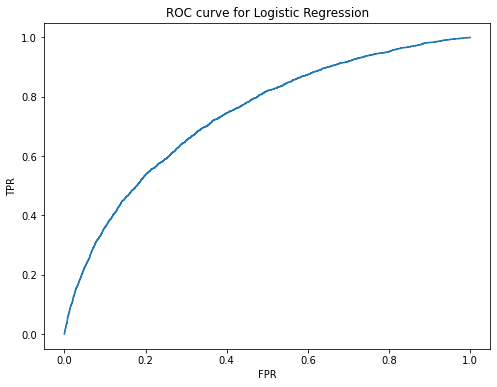

In [ ]:
#Plotting the RUC curve
from sklearn import metrics
train_acc = model.score(X_train, y_train)
validAcc  = model.score(X_valid, y_valid)
testAcc  = model.score(X_test, y_test)
    
predictions = model.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
       
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.show()

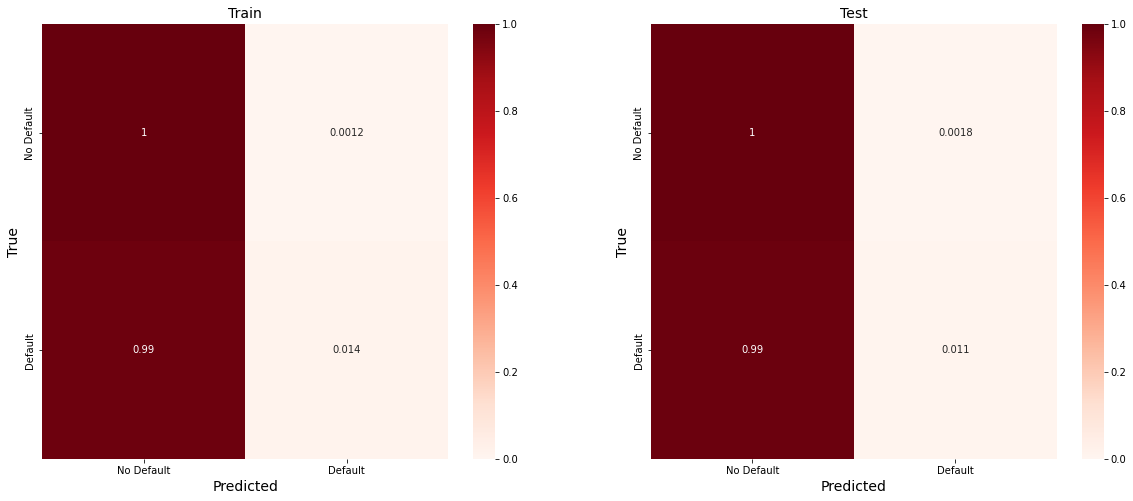

In [ ]:
# Create confusion matrix for baseline model
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

## Baseline model for Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
full_pipeline_with_rfpredictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", RandomForestClassifier(bootstrap = True,max_depth = 10, max_features = 2, n_estimators = 100))
    ])
model_rf = full_pipeline_with_rfpredictor.fit(X_train, y_train)

### Evaluation metrics

In [ ]:
np.round(accuracy_score(y_train, model_rf.predict(X_train)), 3)

0.919

In [ ]:
roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])

0.8118659043356685

In [ ]:
exp_name = "Baseline Random Forest "
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_rf.predict(X_train)), 
                accuracy_score(y_valid, model_rf.predict(X_valid)),
                accuracy_score(y_test, model_rf.predict(X_test)),
                roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_rf.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_rf.predict(X_train)),
                f1_score(y_valid, model_rf.predict(X_valid)),
                f1_score(y_test, model_rf.predict(X_test)),
                log_loss(y_train, model_rf.predict(X_train)),
                log_loss(y_valid, model_rf.predict(X_valid)),
                log_loss(y_test, model_rf.predict(X_test))],4))
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline Logistic Regression     0.9189     0.9186     0.9181     0.7502   
1       Baseline Random Forest      0.9188     0.9188     0.9188     0.8119   

   Valid AUC  Test  Acc  Train F1  Valid F1  Test  F1  Train Log loss  \
0     0.7355     0.7386    0.0271    0.0267     0.021          2.8027   
1     0.7017     0.7067    0.0000    0.0000     0.000          2.8038   

   Valid Log loss  Test  Log loss  
0          2.8111          2.8303  
1          2.8047          2.8034

Score 0.7066690623457327


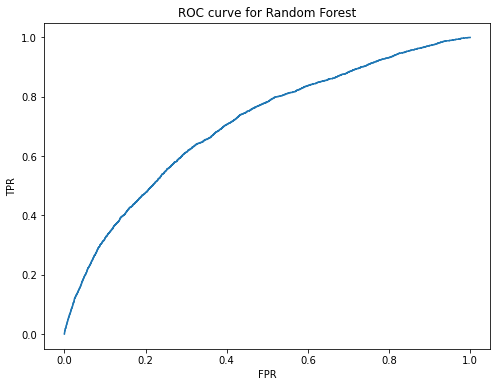

In [ ]:
from sklearn import metrics
train_acc = model_rf.score(X_train, y_train)
validAcc  = model_rf.score(X_valid, y_valid)
testAcc  = model_rf.score(X_test, y_test)
    
predictions = model_rf.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
    
    
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest')
plt.show()

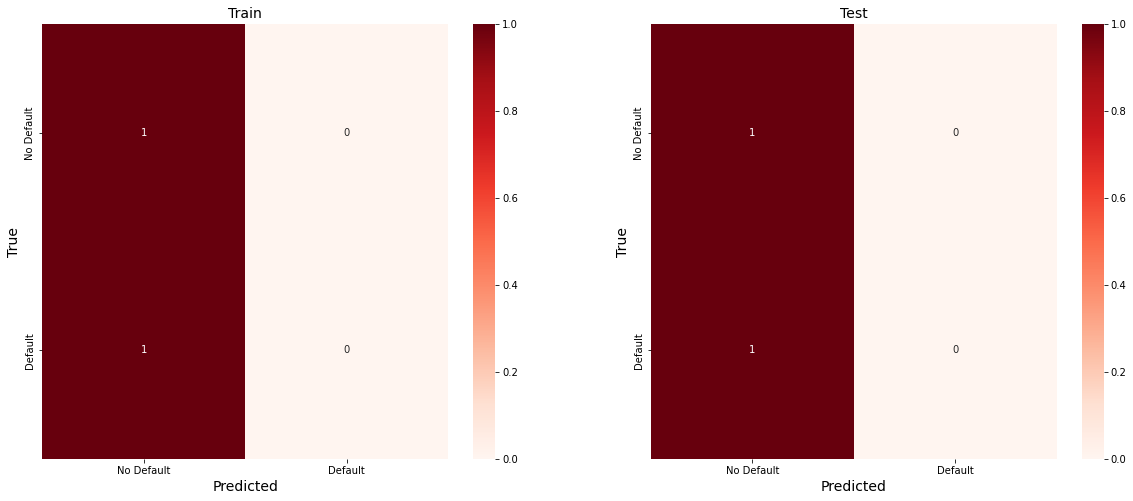

In [ ]:
# Create confusion matrix for baseline model
confusion_matrix_def(model_rf,X_train,y_train,X_test,y_test)

## Baseline model for Naive Bayes Classifer

In [ ]:
from sklearn.naive_bayes import GaussianNB


full_pipeline_with_nb = Pipeline([
        ("preparation", data_prep_pipeline),
        ("nb", GaussianNB())
    ])

model_nb = full_pipeline_with_nb.fit(X_train,y_train)

In [ ]:
np.round(accuracy_score(y_train, model_nb.predict(X_train)), 3)

0.138

In [ ]:
roc_auc_score(y_train, model_nb.predict_proba(X_train)[:, 1])

0.6145195253683824

In [ ]:
exp_name = "Baseline Naive Bayes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_nb.predict(X_train)), 
                accuracy_score(y_valid, model_nb.predict(X_valid)),
                accuracy_score(y_test, model_nb.predict(X_test)),
                roc_auc_score(y_train, model_nb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_nb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_nb.predict(X_train)),
                f1_score(y_valid, model_nb.predict(X_valid)),
                f1_score(y_test, model_nb.predict(X_test)),
                log_loss(y_train, model_nb.predict(X_train)),
                log_loss(y_valid, model_nb.predict(X_valid)),
                log_loss(y_test, model_nb.predict(X_test))],4))
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline Logistic Regression     0.9189     0.9186     0.9181     0.7502   
1       Baseline Random Forest      0.9188     0.9188     0.9188     0.8119   
2          Baseline Naive Bayes     0.1383     0.1326     0.1374     0.6145   

   Valid AUC  Test  Acc  Train F1  Valid F1  Test  F1  Train Log loss  \
0     0.7355     0.7386    0.0271    0.0267    0.0210          2.8027   
1     0.7017     0.7067    0.0000    0.0000    0.0000          2.8038   
2     0.5963     0.5973    0.1542    0.1514    0.1532         29.7615   

   Valid Log loss  Test  Log loss  
0          2.8111          2.8303  
1          2.8047          2.8034  
2         29.9602         29.7942

Score 0.5972571828402228


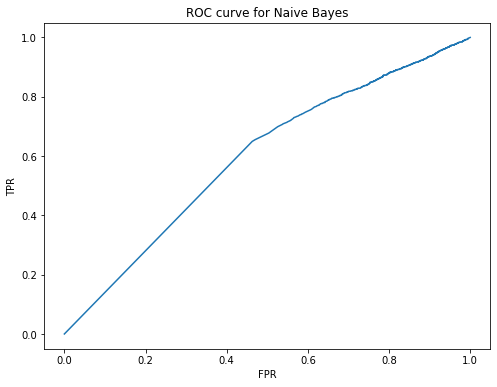

In [ ]:
from sklearn import metrics
train_acc = model_nb.score(X_train, y_train)
validAcc  = model_nb.score(X_valid, y_valid)
testAcc  = model_nb.score(X_test, y_test)
    
predictions = model_nb.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
    
    
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Naive Bayes')
plt.show()

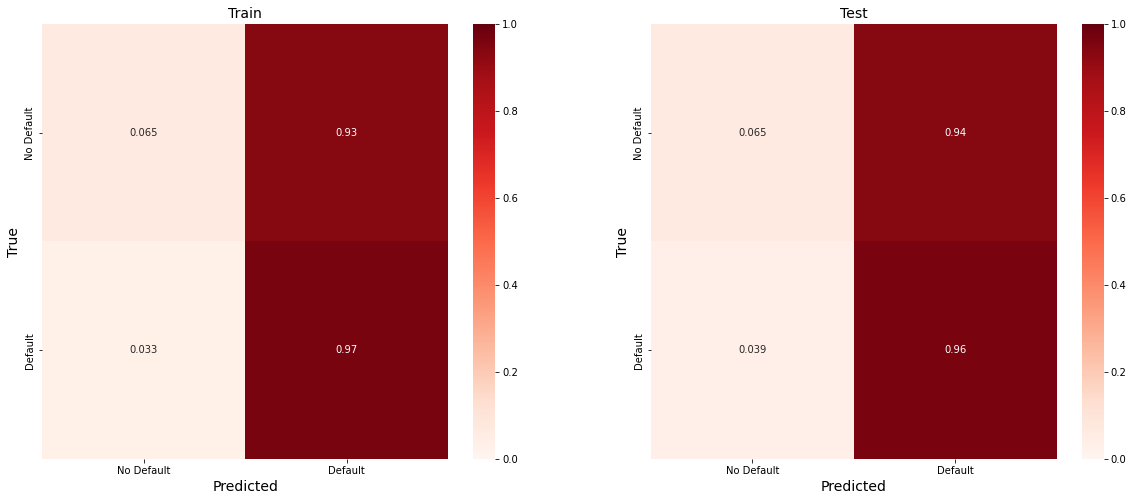

In [ ]:
# Create confusion matrix for baseline model
confusion_matrix_def(model_nb,X_train,y_train,X_test,y_test)

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean'), ('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean'), ('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_sum', 'sum')]}
{'AMT_ANNUITY': [('bureau_AMT_ANNUITY_min', 'min'), ('bureau_AMT_ANNUITY_max', 'max'), ('bureau_AMT_ANNUITY_mean', 'mean'), ('bureau_AMT_ANNUITY_count', 'count'), ('bureau_AMT_ANNUITY_sum', 'sum')], 'AMT_CREDIT_SUM': [('bureau_AMT_CREDIT_SUM_min', 'min'), ('bureau_AMT_CREDIT_SUM_max', 'max'), ('bureau_AMT_CREDIT_SUM_mean', 'mean'), ('bureau_AMT_CREDIT_SUM_count', 'count'), ('bureau_AMT_CREDIT_SUM_sum', 'sum')]}
{'MONTHS_BALANCE': [('bureau_balance_MONTHS_BALANCE_min', 'min'), ('bureau_balance_MONTHS_BALANCE_max', 'max'), ('bureau_balance_MONTHS_BALANCE_

# Phase 3

### Feature Engineering

In [25]:
## This function drops columns from df having missing values more than the threshold

def drop_zeros_cols(df,thresh):
    thresh_null_df = pd.DataFrame()
    columns = []
    percent =[]
    for col in df.columns:
        if col == 'TARGET':
            continue
        cnt = (df[col]==0).sum()
        columns.append(col)
        percent.append(cnt/len(df[col]))
    thresh_null_df['Col'] = columns
    thresh_null_df['Percent'] = percent
    thresh = thresh/100
    thresh_null_df = thresh_null_df[thresh_null_df['Percent']>thresh]
    df.drop(columns=thresh_null_df['Col'],inplace=True)
    return df

In [26]:
## Filter columns from train csv having more than 90% empty cokumns
app_train_df = drop_zeros_cols(datasets['application_train'],90)

In [27]:
def missing_data_stat(df,n):
    cat = []
    final_df = []
    values_missing = df.isnull().sum(axis=0)*100/len(df)
    new_df = values_missing.sort_values(ascending=False).reset_index()
    new_df.columns = ['index','flag']
    for row in new_df.itertuples():
        try:
            final_df.append([row.index,row.flag,df[row.index].median(),df[row.index].mean(), df[row.index].nunique()])
        except:
            final_df.append([row.index,row.flag,df[row.index].mode(),'NA',df[row.index].nunique()])
    cols = ['column_name','missing%','med/mod','mean','unique_val_count']
    temp_df = pd.DataFrame(final_df,columns=cols)   
    return  temp_df[temp_df['missing%']>n]

In [28]:
## Separate numeric and categoric data
def separate_numeric_categoric_data(df):
    numeric_df= df.select_dtypes(exclude='object')
    numeric_df['TARGET'] = df['TARGET']
    categoric_df= df.select_dtypes(include='object')
    return numeric_df,categoric_df

In [29]:
def correlation_target(df,cor_thresh):
    correlation_matrix = df.corr()['TARGET'].sort_values(key=abs,ascending=False).reset_index()
    correlation_matrix.columns = ['Column','Correlation-Value']
    column_final = correlation_matrix[abs(correlation_matrix['Correlation-Value'])>cor_thresh]
    return column_final

In [30]:
numeric_df, categoric_df = separate_numeric_categoric_data(app_train_df)

In [31]:
numeric_df

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  DEF_30_CNT_SOCIAL_CIRCLE  \
0                -637  ...                       2.0   
1               -1188  ...                       0.0   
2                -225  ...                       0.0   
3               -3039  ...                       0.0   
4               -3038  ...                       0.0   
...               ...  ...                       ...   
307506           -236  ...                       0.0   
307507         365243  ...                       0.0   
307508          -7921  ...                       0.0   
307509          -4786  ...                       0.0   
307510          -1262  ...                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0                            2.0                 -1134.0                1   
1                            1.0                  -828.0                1   
2                            0.0                  -815.0                0   
3                            2.0                  -617.0                1   
4                            0.0                 -1106.0                0   
...                          ...                     ...              ...   
307506                       0.0                  -273.0                0   
307507                       0.0                     0.0                1   
307508                       6.0                 -1909.0                1   
307509                       0.0                  -322.0                1   
307510                       0.0                  -787.0                1   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN      

In [32]:
categoric_df

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government                NaN   
3                       WEDNESDAY  Business Entity Type 3                NaN   
4                        THURSDAY                Religion                NaN   
...                           ...                     ...                ...   
307506                   THURSDAY                Services   reg oper account   
307507                     MONDAY                     XNA   reg oper account   
307508                   THURSDAY                  School   reg oper account   
307509                  WEDNESDAY  Business Entity Type 1                NaN   
307510                   THURSDAY  Business Entity Type 3                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2                  NaN                NaN                 NaN  
3                  NaN                NaN                 NaN  
4                  NaN                NaN                 NaN  
...                ...                ...                 ...  
307

In [33]:
app_train_df=app_train_df[app_train_df['CODE_GENDER']!='XNA']

app_train_df=app_train_df[app_train_df['NAME_FAMILY_STATUS']!='Unknown']

app_train_df=app_train_df[app_train_df['NAME_INCOME_TYPE']!='Maternity leave']

In [34]:
correlation_data_df = correlation_target(numeric_df,0.01)
correlation_data_df

Column  Correlation-Value
0                      TARGET           1.000000
1                EXT_SOURCE_3          -0.178919
2                EXT_SOURCE_2          -0.160472
3                EXT_SOURCE_1          -0.155317
4                  DAYS_BIRTH           0.078239
..                        ...                ...
59         NONLIVINGAREA_MODE          -0.012711
60  AMT_REQ_CREDIT_BUREAU_MON          -0.012462
61              LANDAREA_MEDI          -0.011256
62               LANDAREA_AVG          -0.010885
63              LANDAREA_MODE          -0.010174

[64 rows x 2 columns]

In [35]:
df_with_no_missing_data = missing_data_stat(app_train_df[correlation_data_df['Column']],0)

In [36]:
df_with_no_missing_data

column_name   missing%        med/mod           mean  \
0               COMMONAREA_AVG  69.871870       0.021100       0.044622   
1              COMMONAREA_MEDI  69.871870       0.020800       0.044596   
2              COMMONAREA_MODE  69.871870       0.019000       0.042554   
3        LIVINGAPARTMENTS_MEDI  68.354797       0.076100       0.101956   
4         LIVINGAPARTMENTS_AVG  68.354797       0.075600       0.100776   
5        LIVINGAPARTMENTS_MODE  68.354797       0.077100       0.105646   
6               FLOORSMIN_MODE  67.848455       0.208300       0.228060   
7               FLOORSMIN_MEDI  67.848455       0.208300       0.231626   
8                FLOORSMIN_AVG  67.848455       0.208300       0.231895   
9              YEARS_BUILD_AVG  66.497886       0.755200       0.752469   
10            YEARS_BUILD_MEDI  66.497886       0.758500       0.755744   
11            YEARS_BUILD_MODE  66.497886       0.764800       0.759635   
12                 OWN_CAR_AGE  65.990569       9.000000      12.061160   
13               LANDAREA_MEDI  59.376585       0.048700       0.067170   
14                LANDAREA_AVG  59.376585       0.048100       0.066334   
15               LANDAREA_MODE  59.376585       0.045800       0.064959   
16            BASEMENTAREA_AVG  58.516423       0.076300       0.088444   
17           BASEMENTAREA_MEDI  58.516423       0.075800       0.087956   
18           BASEMENTAREA_MODE  58.516423       0.074600       0.087544   
19                EXT_SOURCE_1  56.381789       0.505994       0.502124   
20          NONLIVINGAREA_MODE  55.179187       0.001100       0.027023   
21          NONLIVINGAREA_MEDI  55.179187       0.003100       0.028237   
22           NONLIVINGAREA_AVG  55.179187       0.003600       0.028359   
23               ELEVATORS_AVG  53.296260       0.000000       0.078942   
24              ELEVATORS_MEDI  53.296260       0.000000       0.078078   
25              ELEVATORS_MODE  53.296260       0.000000       0.074490   
26              APARTMENTS_AVG  50.749919       0.087600       0.117442   
27             APARTMENTS_MODE  50.749919       0.084000       0.114232   
28             APARTMENTS_MEDI  50.749919       0.086400       0.117852   
29              ENTRANCES_MODE  50.348943       0.137900       0.145195   
30               ENTRANCES_AVG  50.348943       0.137900       0.149727   
31              ENTRANCES_MEDI  50.348943       0.137900       0.149215   
32              LIVINGAREA_AVG  50.193496       0.074500       0.107400   
33             LIVINGAREA_MODE  50.193496       0.073100       0.105976   
34             LIVINGAREA_MEDI  50.193496       0.074900       0.108608   
35               FLOORSMAX_AVG  49.760976       0.166700       0.226282   
36              FLOORSMAX_MEDI  49.760976       0.166700       0.225897   
37              FLOORSMAX_MODE  49.760976       0.166700       0.222315   
38              TOTALAREA_MODE  48.268618       0.068800       0.102548   
39                EXT_SOURCE_3  19.824065       0.535276       0.510856   
40  AMT_REQ_CREDIT_BUREAU_YEAR  13.500488       1.000000       1.899961   
41   AMT_REQ_CREDIT_BUREAU_MON  13.500488       0.000000       0.267390   
42    DEF_30_CNT_SOCIAL_CIRCLE   0.332033       0.000000       0.143406   
43                EXT_SOURCE_2   0.214634       0.565956       0.514391   
44             AMT_GOODS_PRICE   0.089756  450000.000000  538394.285593   
45                 AMT_ANNUITY   0.003902   24903.000000   27108.477604   
46      DAYS_LAST_PHONE_CHANGE   0.000325    -757.000000    -962.865681   

    unique_val_count  
0               3181  
1               3202  
2               3128  
3               1097  
4               1868  
5                736  
6                 25  
7                 47  
8                305  
9                149  
10               151  
11               154  
12                62  
13              3560  
14              3527  
15              3563  
16              3780  
17  

In [37]:
data_with_no_miss_col = list(set(correlation_data_df.Column).difference(set(df_with_no_missing_data.column_name)))
data_with_no_miss_col

['DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_POPULATION_RELATIVE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_3',
 'CNT_CHILDREN',
 'TARGET']

In [38]:
discrete_vs_categ = df_with_no_missing_data[df_with_no_missing_data['unique_val_count']<=8]
df_with_no_missing_data = df_with_no_missing_data[df_with_no_missing_data['unique_val_count']>8]

In [39]:
test_data_df = datasets['application_test']
for i in discrete_vs_categ.column_name:
    numeric_df[i] = numeric_df[i].fillna(numeric_df[i].mode()[0])

for i in discrete_vs_categ.column_name:
    test_data_df[i] = test_data_df[i].fillna(numeric_df[i].mode()[0])

In [40]:
final_numeric_cols=list(discrete_vs_categ.column_name) + list(df_with_no_missing_data.column_name)+data_with_no_miss_col
final_numeric_cols

['COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',


In [41]:
numeric_df_temp = numeric_df
numeric_df = numeric_df[final_numeric_cols]
numeric_df.insert(0,"SK_ID_CURR",numeric_df_temp['SK_ID_CURR'])
numeric_df.head()

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0      100002          0.0143           0.0144           0.0144   
1      100003          0.0605           0.0608           0.0497   
2      100004             NaN              NaN              NaN   
3      100006             NaN              NaN              NaN   
4      100007             NaN              NaN              NaN   

   LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
0                 0.0205                0.0202                  0.022   
1                 0.0787                0.0773                  0.079   
2                    NaN                   NaN                    NaN   
3                    NaN                   NaN                    NaN   
4                    NaN                   NaN                    NaN   

   FLOORSMIN_MODE  FLOORSMIN_MEDI  FLOORSMIN_AVG  ...  DAYS_EMPLOYED  \
0          0.1250          0.1250         0.1250  ...           -637   
1          0.3333          0.3333         0.3333  ...          -1188   
2             NaN             NaN            NaN  ...           -225   
3             NaN             NaN            NaN  ...          -3039   
4             NaN             NaN            NaN  ...          -3038   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_WORK_CITY  \
0                            2                       0   
1                            1                       0   
2                            2                       0   
3                            2                       0   
4                            2                       1   

   REGION_POPULATION_RELATIVE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  AMT_CREDIT  \
0                    0.018801               1                0    406597.5   
1                    0.003541               1                0   1293502.5   
2                    0.010032               1                1    135000.0   
3                    0.008019               1                0    312682.5   
4                    0.028663               1                0    513000.0   

   FLAG_DOCUMENT_3  CNT_CHILDREN  TARGET  
0                1             0       1  
1                1             0       0  
2                0             0       0  
3                1             0       0  
4                0             0       0  

[5 rows x 65 columns]

In [42]:
categoric_df_temp = missing_data_stat(categoric_df,0)
categoric_df_temp

column_name   missing%                              med/mod mean  \
0   FONDKAPREMONT_MODE  68.386172  0    reg oper account
dtype: object   NA   
1   WALLSMATERIAL_MODE  50.840783             0    Panel
dtype: object   NA   
2       HOUSETYPE_MODE  50.176091    0    block of flats
dtype: object   NA   
3  EMERGENCYSTATE_MODE  47.398304                0    No
dtype: object   NA   
4      OCCUPATION_TYPE  31.345545          0    Laborers
dtype: object   NA   
5      NAME_TYPE_SUITE   0.420148     0    Unaccompanied
dtype: object   NA   

   unique_val_count  
0                 4  
1                 7  
2                 3  
3                 2  
4                18  
5                 7

In [43]:
categoric_columns_to_remove = list(categoric_df_temp[categoric_df_temp["missing%"]>50].column_name.values)
categoric_columns_to_remove

['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE']

In [44]:
categoric_df.drop(columns = categoric_columns_to_remove,inplace=True)
categoric_df

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE EMERGENCYSTATE_MODE  
0                       WEDNESDAY  Business Entity Type 3                  No  
1                          MONDAY                  School                  No  
2                          MONDAY              Government                 NaN  
3                       WEDNESDAY  Business Entity Type 3                 NaN  
4                        THURSDAY                Religion                 NaN  
...                           ...                     ...                 ...  
307506                   THURSDAY                Services                  No  
307507                     MONDAY                     XNA                  No  
307508                   THURSDAY                  School                  No  
307509                  WEDNESDAY  Business Entity Type 1                  No  
307510                   THURSDAY  Business Entity Type 3                  No  

[307511 rows x 13 columns]

In [45]:
final_columns_list = list(numeric_df.columns)+ list(categoric_df.columns)
final_columns_list

['SK_ID_CURR',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',


In [46]:
len(final_columns_list)

78

In [47]:
final_train_df = app_train_df[final_columns_list]
final_train_df

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0           100002          0.0143           0.0144           0.0144   
1           100003          0.0605           0.0608           0.0497   
2           100004             NaN              NaN              NaN   
3           100006             NaN              NaN              NaN   
4           100007             NaN              NaN              NaN   
...            ...             ...              ...              ...   
307506      456251          0.0202           0.0203           0.0172   
307507      456252          0.0022           0.0022           0.0022   
307508      456253          0.0123           0.0124           0.0124   
307509      456254             NaN              NaN              NaN   
307510      456255          0.0176           0.0177           0.0178   

        LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
0                      0.0205                0.0202                 0.0220   
1                      0.0787                0.0773                 0.0790   
2                         NaN                   NaN                    NaN   
3                         NaN                   NaN                    NaN   
4                         NaN                   NaN                    NaN   
...                       ...                   ...                    ...   
307506                 0.1509                0.1484                 0.0882   
307507                 0.0205                0.0202                 0.0220   
307508                 0.0855                0.0841                 0.0918   
307509                    NaN                   NaN                    NaN   
307510                    NaN                   NaN                    NaN   

        FLOORSMIN_MODE  FLOORSMIN_MEDI  FLOORSMIN_AVG  ...  FLAG_OWN_REALTY  \
0               0.1250          0.1250         0.1250  ...                Y   
1               0.3333          0.3333         0.3333  ...                N   
2                  NaN             NaN            NaN  ...                Y   
3                  NaN             NaN            NaN  ...                Y   
4                  NaN             NaN            NaN  ...                Y   
...                ...             ...            ...  ...              ...   
307506          0.0417          0.2708         0.2708  ...                N   
307507          0.1250          0.1250         0.1250  ...                Y   
307508          0.2083          0.2083         0.2083  ...                Y   
307509             NaN             NaN            NaN  ...                Y   
307510             NaN             NaN            NaN  ...                N   

        NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         Unaccompanied               Working  Secondary / secondary special   
1                Family         State servant               Higher education   
2         Unaccompanied               Working  Secondary / secondary special   
3         Unaccompanied               Working  Secondary / secondary special   
4         Unaccompanied               Working  Secondary / secondary special   
...                 ...                   ...                            ...   
307506    Unaccompanied               Working  Secondary / secondary special   
307507    Unaccompanied             Pensioner  Secondary / secondary special   
307508    Unaccompanied               Working               Higher education   
307509    Unaccompanied  Commercial associate  Secondary / secondary special   
307510    Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
0       Single / not married  House / apartment         Laborers   
1                    Married  House / apartment       Core staff   
2       Single / not married  House / apartment         Laborers   
3             Civil marr

In [48]:
datasets['credit_card_balance']['amt_tot_rec_bal']= datasets['credit_card_balance']['AMT_TOTAL_RECEIVABLE']/(datasets['credit_card_balance']['AMT_BALANCE']+1)
datasets['credit_card_balance']['tot_rec'] = datasets['credit_card_balance']['AMT_TOTAL_RECEIVABLE']/(datasets['credit_card_balance']['AMT_RECIVABLE']+1)
datasets['credit_card_balance']['amt_totrec_princ'] = datasets['credit_card_balance']['AMT_TOTAL_RECEIVABLE']/(datasets['credit_card_balance']['AMT_RECEIVABLE_PRINCIPAL']+1)
datasets['credit_card_balance']['amt_bal_recv']=datasets['credit_card_balance']['AMT_BALANCE']/(datasets['credit_card_balance']['AMT_RECIVABLE']+1)
datasets['credit_card_balance']['amt_bal_recprinc']=datasets['credit_card_balance']['AMT_BALANCE']/(datasets['credit_card_balance']['AMT_RECEIVABLE_PRINCIPAL']+1)
datasets['credit_card_balance']['amt_rec_princ']=datasets['credit_card_balance']['AMT_RECIVABLE']/(datasets['credit_card_balance']['AMT_RECEIVABLE_PRINCIPAL']+1)

final_train_df['total_ext_src_wrt_amt_receivable']=(final_train_df['EXT_SOURCE_1']+final_train_df['EXT_SOURCE_2']+final_train_df['EXT_SOURCE_3'])/(datasets['credit_card_balance']['AMT_TOTAL_RECEIVABLE']+1)
final_train_df['total_ext_src']=(final_train_df['EXT_SOURCE_1']+final_train_df['EXT_SOURCE_2']+final_train_df['EXT_SOURCE_3'])
final_train_df['mul_total_ext_src_1']=(final_train_df['EXT_SOURCE_1']*final_train_df['EXT_SOURCE_2']*final_train_df['EXT_SOURCE_3'])
final_train_df['mul_total_ext_src_2']=(final_train_df['EXT_SOURCE_1']*2+final_train_df['EXT_SOURCE_2']*3+final_train_df['EXT_SOURCE_3']*4)
final_train_df['max_total_ext_src']=[max(element1,element2,element3) for element1, element2, element3 in zip(final_train_df['EXT_SOURCE_1'], final_train_df['EXT_SOURCE_2'], final_train_df['EXT_SOURCE_3'])]

In [49]:
agg_funcs = ['min', 'max', 'mean', 'count', 'sum']

app_tr = final_train_df
app_test= test_data_df
app_tr_features = ['AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','total_ext_src_wrt_amt_receivable','total_ext_src','mul_total_ext_src_1','mul_total_ext_src_2','max_total_ext_src']

prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION']

bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM']

bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']

cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM','AMT_TOTAL_RECEIVABLE','AMT_RECIVABLE','AMT_RECEIVABLE_PRINCIPAL','amt_tot_rec_bal','tot_rec','amt_totrec_princ','amt_bal_recv','amt_bal_recprinc','amt_rec_princ']

installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT']

pos_bal = datasets['POS_CASH_balance']
pos_bal_features = ['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']


## Feature Aggregator

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result

In [51]:
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

prevApps_feature_pipeline = Pipeline([
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_bal_features_pipeline = Pipeline([
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

cc_bal_features_pipeline = Pipeline([
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

installments_pmnts_features_pipeline = Pipeline([
    ('installments_pmnts_features_aggregator', FeaturesAggregator('installments_payments', installments_pmnts_features , agg_funcs)), # Aggregate across old and new features
    ])

pos_features_pipeline = Pipeline([
    ('pos_features_pipe_aggregator', FeaturesAggregator('POS_CASH_balance', pos_bal_features , agg_funcs)), # Aggregate across old and new features
    ])
# Feature engineering pipeline for application_train
appln_feature_pipeline = Pipeline([
    ('engineer_features', FeaturesAggregator('application_train',app_tr_features,agg_funcs)),  # add some new features
    ])

# Feature engineering pipeline for application_test
appln_feature_pipeline_test = Pipeline([
    ('engineer_features', FeaturesAggregator('application_test',app_tr_features,agg_funcs)),  # add some new features
    ])

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean'), ('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean'), ('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_sum', 'sum')]}
{'AMT_ANNUITY': [('bureau_AMT_ANNUITY_min', 'min'), ('bureau_AMT_ANNUITY_max', 'max'), ('bureau_AMT_ANNUITY_mean', 'mean'), ('bureau_AMT_ANNUITY_count', 'count'), ('bureau_AMT_ANNUITY_sum', 'sum')], 'AMT_CREDIT_SUM': [('bureau_AMT_CREDIT_SUM_min', 'min'), ('bureau_AMT_CREDIT_SUM_max', 'max'), ('bureau_AMT_CREDIT_SUM_mean', 'mean'), ('bureau_AMT_CREDIT_SUM_count', 'count'), ('bureau_AMT_CREDIT_SUM_sum', 'sum')]}
{'MONTHS_BALANCE': [('bureau_balance_MONTHS_BALANCE_min', 'min'), ('bureau_balance_MONTHS_BALANCE_max', 'max'), ('bureau_balance_MONTHS_BALANCE_

In [52]:
appsTrainDF = final_train_df #app train df
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app
posDF = datasets["POS_CASH_balance"] # POS Cash Balance
bureaubalDF = datasets['bureau_balance'] #bureau bal
ccbalDF = datasets["credit_card_balance"] #prev app
installmentspaymentsDF = datasets["installments_payments"] #bureau app

In [53]:
apps_aggregated = appln_feature_pipeline.fit_transform(appsTrainDF)
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)
pos_aggregated = pos_features_pipeline.fit_transform(posDF)
ccblance_aggregated = cc_bal_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installments_pmnts_features_pipeline.fit_transform(installmentspaymentsDF)

## Join the labeled dataset

### Prepare Datasets

In [54]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [55]:
merge_all_data = True

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    appsTrainDF = appsTrainDF.merge(apps_aggregated, how='left', on='SK_ID_CURR')
    appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")
    appsTrainDF = appsTrainDF.merge(pos_aggregated, how='left', on="SK_ID_CURR")

In [56]:
print(appsTrainDF.shape)
appsTrainDF.head(3)

(307500, 228)


SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0      100002          0.0143           0.0144           0.0144   
1      100003          0.0605           0.0608           0.0497   
2      100004             NaN              NaN              NaN   

   LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
0                 0.0205                0.0202                  0.022   
1                 0.0787                0.0773                  0.079   
2                    NaN                   NaN                    NaN   

   FLOORSMIN_MODE  FLOORSMIN_MEDI  FLOORSMIN_AVG  ...  \
0          0.1250          0.1250         0.1250  ...   
1          0.3333          0.3333         0.3333  ...   
2             NaN             NaN            NaN  ...   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_min  \
0                                         6.0   
1                                         0.0   
2                                         0.0   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_max  \
0                                        24.0   
1                                        12.0   
2                                         4.0   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                    15.000000   
1                                     5.785714   
2                                     2.250000   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_count  \
0                                          19.0   
1                                          28.0   
2                                           4.0   

   POS_CASH_balance_CNT_INSTALMENT_FUTURE_sum  \
0                                       285.0   
1                                       162.0   
2                                         9.0   

   POS_CASH_balance_CNT_INSTALMENT_min  POS_CASH_balance_CNT_INSTALMENT_max  \
0                                 24.0                                 24.0   
1                                  6.0                                 12.0   
2                                  3.0                                  4.0   

   POS_CASH_balance_CNT_INSTALMENT_mean  \
0                             24.000000   
1                             10.107143   
2                              3.750000   

   POS_CASH_balance_CNT_INSTALMENT_count  POS_CASH_balance_CNT_INSTALMENT_sum  
0                                   19.0                                456.0  
1                                   28.0                                283.0  
2                                    4.0                                 15.0  

[3 rows x 228 columns]

## Join the unlabeled dataset (i.e., the submission file)

In [57]:
len(final_columns_list)

78

In [58]:
final_columns_list.remove('TARGET')

In [59]:
df_test_n = test_data_df[final_columns_list]

In [60]:
df_test_n['total_ext_src_wrt_amt_receivable']=(df_test_n['EXT_SOURCE_1']+df_test_n['EXT_SOURCE_2']+df_test_n['EXT_SOURCE_3'])/(datasets['credit_card_balance']['AMT_TOTAL_RECEIVABLE']+1)
df_test_n['total_ext_src']=(df_test_n['EXT_SOURCE_1']+df_test_n['EXT_SOURCE_2']+df_test_n['EXT_SOURCE_3'])
df_test_n['mul_total_ext_src_1']=(df_test_n['EXT_SOURCE_1']*df_test_n['EXT_SOURCE_2']*df_test_n['EXT_SOURCE_3'])
df_test_n['mul_total_ext_src_2']=(df_test_n['EXT_SOURCE_1']*2+df_test_n['EXT_SOURCE_2']*3+df_test_n['EXT_SOURCE_3']*4)
df_test_n['max_total_ext_src']=[max(ele1,ele2,ele3) for ele1, ele2, ele3 in zip(df_test_n['EXT_SOURCE_1'], df_test_n['EXT_SOURCE_2'], df_test_n['EXT_SOURCE_3'])]

In [61]:
X_kaggle_test = df_test_n
apps_aggregated_test = appln_feature_pipeline.fit_transform(X_kaggle_test)

In [62]:
merge_all_data = True
if merge_all_data:
    X_kaggle_test = X_kaggle_test.merge(apps_aggregated_test, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(pos_aggregated, how='left', on="SK_ID_CURR")

In [63]:
X_kaggle_test

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0          100001             NaN              NaN              NaN   
1          100005             NaN              NaN              NaN   
2          100013             NaN              NaN              NaN   
3          100028          0.1165           0.1173           0.1176   
4          100038             NaN              NaN              NaN   
...           ...             ...              ...              ...   
48739      456221             NaN              NaN              NaN   
48740      456222             NaN              NaN              NaN   
48741      456223             NaN              NaN              NaN   
48742      456224             NaN              NaN              NaN   
48743      456250             NaN              NaN              NaN   

       LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
0                        NaN                   NaN                    NaN   
1                        NaN                   NaN                    NaN   
2                        NaN                   NaN                    NaN   
3                     0.2446                0.2404                 0.2626   
4                        NaN                   NaN                    NaN   
...                      ...                   ...                    ...   
48739                    NaN                   NaN                    NaN   
48740                    NaN                   NaN                    NaN   
48741                    NaN                   NaN                    NaN   
48742                    NaN                   NaN                    NaN   
48743                    NaN                   NaN                    NaN   

       FLOORSMIN_MODE  FLOORSMIN_MEDI  FLOORSMIN_AVG  ...  \
0                 NaN             NaN            NaN  ...   
1                 NaN             NaN            NaN  ...   
2                 NaN             NaN            NaN  ...   
3              0.0417          0.0417         0.0417  ...   
4                 NaN             NaN            NaN  ...   
...               ...             ...            ...  ...   
48739             NaN             NaN            NaN  ...   
48740             NaN             NaN            NaN  ...   
48741             NaN             NaN            NaN  ...   
48742             NaN             NaN            NaN  ...   
48743             NaN             NaN            NaN  ...   

       POS_CASH_balance_CNT_INSTALMENT_FUTURE_min  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
48739                                         0.0   
48740                                         0.0   
48741                                         0.0   
48742                                         0.0   
48743                                         0.0   

       POS_CASH_balance_CNT_INSTALMENT_FUTURE_max  \
0                                             4.0   
1                                            12.0   
2                                            36.0   
3                                            24.0   
4                                            12.0   
...                                           ...   
48739                                        24.0   
48740                                        24.0   
48741                                        12.0   
48742                                        24.0   
48743                                        12.0   

       POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                         1.444444   
1                                         7.200000   
2                                        15.305556   
3     

In [64]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [279]:
splits = 3
subsample_rate = 0.3
train_final_df = np.array_split(appsTrainDF, splits)
correlation_df = correlation_target(train_final_df[0],0.03)
correlation_df
y_train = train_final_df[0]['TARGET']
X_train = train_final_df[0].drop(columns=['TARGET'])
categoric_features = X_train.select_dtypes(include=['object']).columns

final_features_list = list(correlation_df['Column'].values)+list(categoric_features.values)
final_train_dframe= train_final_df[0][final_features_list]

y_train = final_train_dframe['TARGET']
X_train = final_train_dframe.drop(columns=['TARGET'])

In [67]:
final_train_dframe.to_csv("final_training_data.csv",index=None)

In [68]:
correlation_df

Column  Correlation-Value
0                                         TARGET           1.000000
1     application_train_mul_total_ext_src_2_mean          -0.234565
2                            mul_total_ext_src_2          -0.234565
3      application_train_mul_total_ext_src_2_max          -0.234565
4      application_train_mul_total_ext_src_2_min          -0.234565
..                                           ...                ...
104                                   FLAG_PHONE          -0.030797
105                     prevApps_AMT_ANNUITY_min          -0.030772
106                                   AMT_CREDIT          -0.030705
107                     prevApps_AMT_ANNUITY_max          -0.030275
108  POS_CASH_balance_CNT_INSTALMENT_FUTURE_mean           0.030135

[109 rows x 2 columns]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"Test              shape: {X_kaggle_test.shape}")

X train           shape: (60987, 121)
X validation      shape: (10763, 121)
X test            shape: (30750, 121)
Test              shape: (48744, 227)


In [70]:
numerical_features = X_train.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

108

In [71]:
numerical_features.values

array(['application_train_mul_total_ext_src_2_mean',
       'mul_total_ext_src_2', 'application_train_mul_total_ext_src_2_max',
       'application_train_mul_total_ext_src_2_min',
       'application_train_total_ext_src_mean', 'total_ext_src',
       'application_train_total_ext_src_min',
       'application_train_total_ext_src_max', 'max_total_ext_src',
       'application_train_max_total_ext_src_min',
       'application_train_max_total_ext_src_max',
       'application_train_max_total_ext_src_mean',
       'application_train_mul_total_ext_src_1_mean',
       'application_train_mul_total_ext_src_1_max',
       'application_train_mul_total_ext_src_1_min', 'mul_total_ext_src_1',
       'application_train_EXT_SOURCE_3_min',
       'application_train_EXT_SOURCE_3_mean',
       'application_train_EXT_SOURCE_3_max', 'EXT_SOURCE_3',
       'application_train_EXT_SOURCE_2_mean',
       'application_train_EXT_SOURCE_2_max',
       'application_train_EXT_SOURCE_2_min', 'EXT_SOURCE_2',
       '

## Create Data Preparation pipeline

Using Feature union, combine numerical and categorical Pipeline together to prepare a Data pipeline

In [72]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_features)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [73]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(categoric_features)),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

In [74]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


In [75]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train AUC", 
                               "Valid AUC",
                               "Test  Acc",
                               "Train F1", 
                               "Valid F1",
                               "Test  F1",
                                "Train Log loss", 
                               "Valid Log loss",
                               "Test  Log loss"])

# Hyperparameter Tuning

## Baseline Model And Pipeline

To get a baseline, we will use some of the features after being preprocessed through the pipeline.

## Baseline model for Logistic Regression

In [108]:
np.random.seed(42)
params  =[{'C': [ 1,5,10.]},{'penalty':['l1','l2']},{'solver' :['liblinear']}]
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
    ('classifier', GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=100),param_grid=params,
                                 cv=5,
                                 refit=True))
])
model = full_pipeline_with_predictor.fit(X_train, y_train)

## Evaluation Metrics

In [109]:
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.919

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.759064965829791

In [111]:
exp_name = "Baseline Logistic Regression"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_valid, model.predict(X_valid)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_valid, model.predict(X_valid)),
                log_loss(y_test, model.predict(X_test))],4))
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline Logistic Regression     0.9191     0.9182     0.9188     0.7591   

   Valid AUC  Test  Acc  Train F1  Valid F1  Test  F1  Train Log loss  \
0     0.7452     0.7473    0.0322    0.0287    0.0273          2.7948   

   Valid Log loss  Test  Log loss  
0          2.8239          2.8046

Score 0.7473439293703406


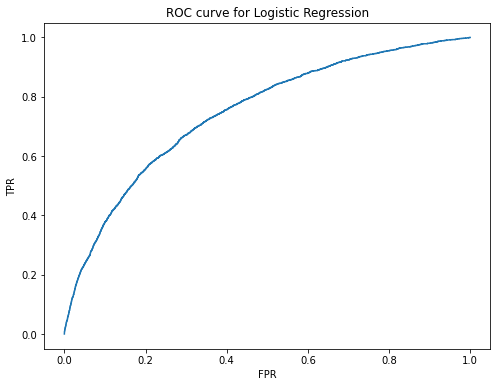

In [112]:
from sklearn import metrics
train_acc = model.score(X_train, y_train)
validAcc  = model.score(X_valid, y_valid)
testAcc  = model.score(X_test, y_test)
    
predictions = model.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
       
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.show()

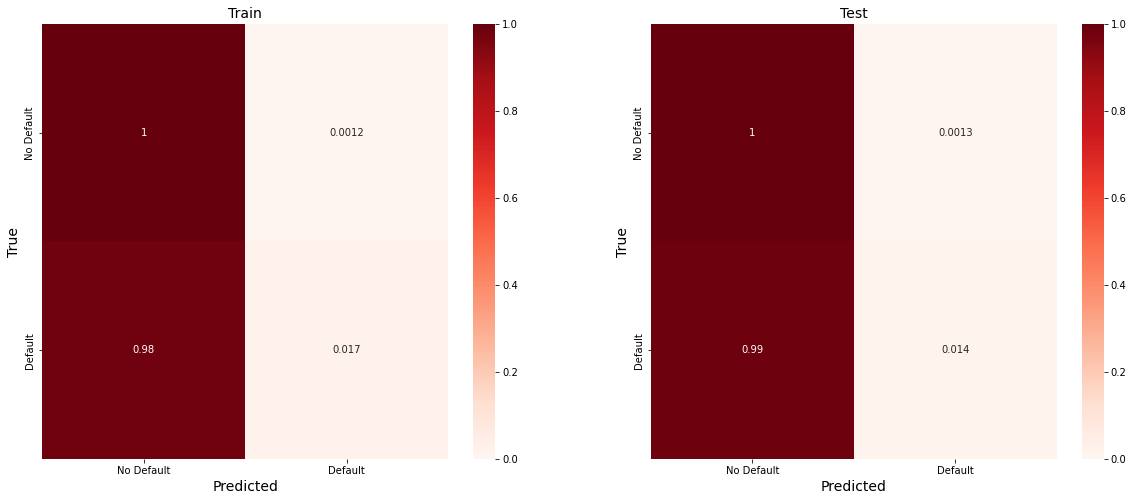

In [117]:
# Create confusion matrix for baseline model
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

## Baseline model for Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

params = { 
    'n_estimators': [40,60,80,100,200],
    'max_features': ['auto'],
    'max_depth' : [15,20,25,30],
    'criterion' :['entropy']
}

np.random.seed(42)
full_pipeline_with_rfpredictor = Pipeline([
("preparation", data_prep_pipeline),
('classifier', GridSearchCV(RandomForestClassifier(),
                                 param_grid=params,
                                 cv=5,
                                 refit=True))
])
model_rf = full_pipeline_with_rfpredictor.fit(X_train, y_train)

## Evaluation Metrics

In [124]:
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

np.round(accuracy_score(y_train, model_rf.predict(X_train)), 3)

0.951

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])

0.9973966330862988

In [126]:
exp_name = "Baseline Random Forest "
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_rf.predict(X_train)), 
                accuracy_score(y_valid, model_rf.predict(X_valid)),
                accuracy_score(y_test, model_rf.predict(X_test)),
                roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_rf.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_rf.predict(X_train)),
                f1_score(y_valid, model_rf.predict(X_valid)),
                f1_score(y_test, model_rf.predict(X_test)),
                log_loss(y_train, model_rf.predict(X_train)),
                log_loss(y_valid, model_rf.predict(X_valid)),
                log_loss(y_test, model_rf.predict(X_test))],4))
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline Logistic Regression     0.9191     0.9182     0.9188     0.7591   
1       Baseline Random Forest      0.9513     0.9188     0.9190     0.9974   

   Valid AUC  Test  Acc  Train F1  Valid F1  Test  F1  Train Log loss  \
0     0.7452     0.7473    0.0322    0.0287    0.0273          2.7948   
1     0.7273     0.7242    0.5720    0.0267    0.0326          1.6808   

   Valid Log loss  Test  Log loss  
0          2.8239          2.8046  
1          2.8047          2.7978

Score 0.7241735139344523


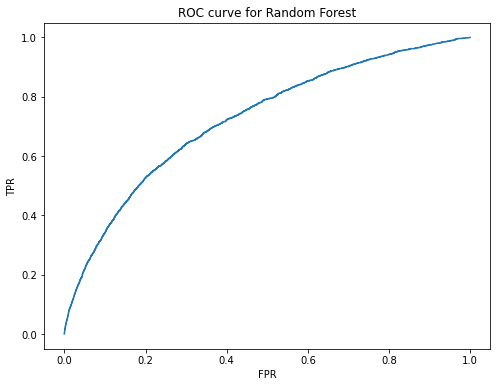

In [127]:
from sklearn import metrics
train_acc = model_rf.score(X_train, y_train)
validAcc  = model_rf.score(X_valid, y_valid)
testAcc  = model_rf.score(X_test, y_test)
    
predictions = model_rf.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
    
    
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest')
plt.show()

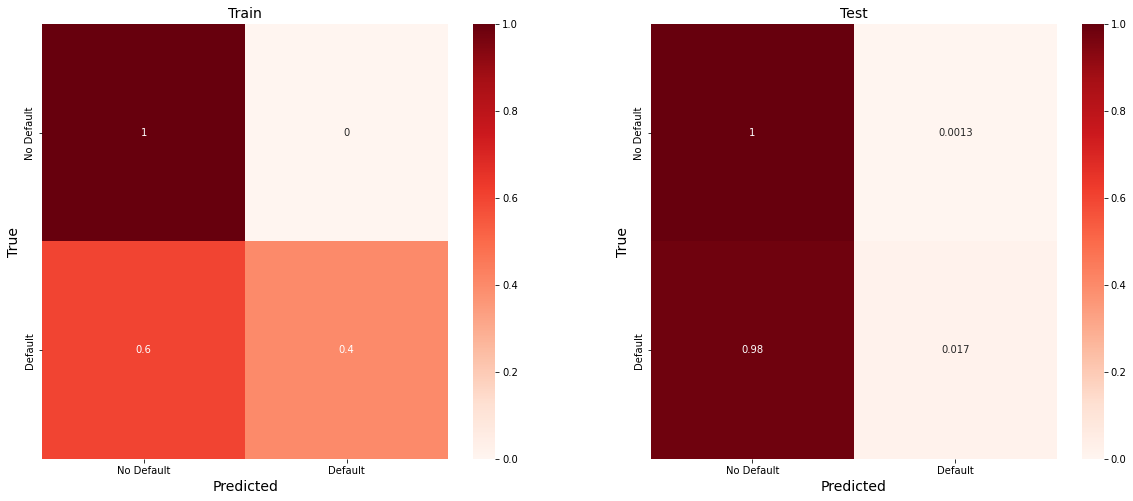

In [128]:
# Create confusion matrix for baseline model
confusion_matrix_def(model_rf,X_train,y_train,X_test,y_test)

# Phase 4 

In [280]:
# Import the Torch Libraries 
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/HCDR/hcdr-1")
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

In [278]:
# check whether cuds is available to enable on GPU or continue with CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data Preparation

In [281]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train = data_prep_pipeline.fit_transform(X_train)
X_validation = data_prep_pipeline.transform(X_validation) 
X_test = data_prep_pipeline.transform(X_test) 

# convert data to float tensor
X_train_tensor = torch.from_numpy(X_train).float()
X_validation_tensor = torch.from_numpy(X_validation).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float()
y_validation_tensor = torch.from_numpy(y_validation.to_numpy()).float()
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float()

# fit tensors to device
X_train = X_train_tensor.to(device)
X_test  = X_test_tensor.to(device)
y_train = torch.tensor(y_train, dtype=torch.long, device=device)
y_test = torch.tensor(y_test.values, dtype=torch.long, device=device)

# Neural Network Model Implementation

## Experiment 1

In [282]:
class MLP_Model(nn.Module):
    def __init__(self,in_features=121,h1=128,h2=64,h3=32,h4=16,out_feat=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,h4)
        self.out = nn.Linear(h4,out_feat)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x,p=0.1)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

In [288]:
torch.manual_seed(20)

In [289]:
loss_func = nn.CrossEntropyLoss()

In [294]:
def train_model(model,n,epochs=1000,losses=[]):
    for i in range(epochs):
        i += 1
        y_pred = model.forward(X_train)
        loss = loss_func(y_pred,y_train)
        losses.append(loss.item())
        _,pred = torch.max(y_pred,1)
        correct_pred = (pred==y_train).sum().item()
        if i%100 == 1:
            print("Epoch: {} Training Loss: {} Training Accuracy : {}".format(i,loss.item(),correct_pred/n))
            writer.add_scalar('Training loss',loss.item(),i)
            writer.add_scalar('Training Accuracy',correct_pred/n,i)
        optim.zero_grad()
        loss.backward()
        optim.step()
    return model

In [295]:
# Train for 1000 epochs
model_1_1000 = MLP_Model().to(device)
optim = torch.optim.Adam(model_1_1000.parameters(),lr=0.001)
model_1_1000 = train_model(model_1_1000,n=y_train.shape[0],epochs=1000)

Epoch: 1 Training Loss: 0.6509423851966858 Training Accuracy : 0.9192502970724857
Epoch: 101 Training Loss: 0.24869434535503387 Training Accuracy : 0.919385330020525
Epoch: 201 Training Loss: 0.2440645694732666 Training Accuracy : 0.9193988333153289
Epoch: 301 Training Loss: 0.237396702170372 Training Accuracy : 0.9202495408879766
Epoch: 401 Training Loss: 0.22746026515960693 Training Accuracy : 0.922558604299449
Epoch: 501 Training Loss: 0.21684405207633972 Training Accuracy : 0.9264205466133737
Epoch: 601 Training Loss: 0.20848461985588074 Training Accuracy : 0.9294452846494544
Epoch: 701 Training Loss: 0.19969254732131958 Training Accuracy : 0.9331586907205358
Epoch: 801 Training Loss: 0.1909247636795044 Training Accuracy : 0.9354137409527925
Epoch: 901 Training Loss: 0.18105360865592957 Training Accuracy : 0.9378308307226964


# Model Evaluation

### Model 1 Train and Test ROC AUC Score

In [262]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_1_1000(X_train)[:, 1].detach().numpy())

0.9499575999335946

In [3]:
predictions = model_1_1000(X_test)[:, 1].detach().numpy()
print ("Score",roc_auc_score(y_test, predictions))

Score 0.710377708465


# Tensorboard Visualizations

In [ ]:
# Tensorboard Visualization for model trained for 1000 epochs on Relu Activation Function

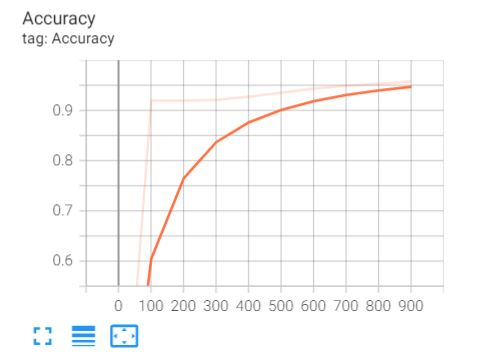

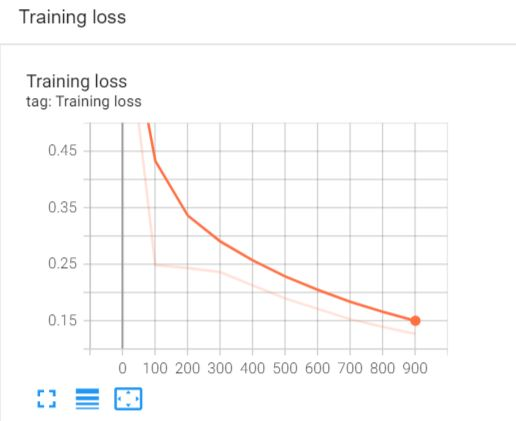

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [223]:
X_kaggle_test = X_kaggle_test.iloc[:,1:]
X_kaggle_test = torch.FloatTensor(data_prep_pipeline.fit_transform(X_kaggle_test))

In [271]:
predictions = []
test_class_scores = []
with torch.no_grad():
    for i,data in enumerate(X_kaggle_test):
        y_pred = model_1_1000(data)
        test_class_scores.append(F.softmax(y_pred)[1].item())
        predictions.append(y_pred.argmax().item())

In [272]:
# Submission dataframe
sub = pd.DataFrame()
sub["SK_ID_CURR"]= datasets["application_test"]['SK_ID_CURR'].astype(int)
sub['TARGET'] = test_class_scores
sub.set_index('SK_ID_CURR')
sub.to_csv('submission.csv',index=False)

In [273]:
sub.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [274]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|███████████████████████████████████████| 1.29M/1.29M [00:01<00:00, 900kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

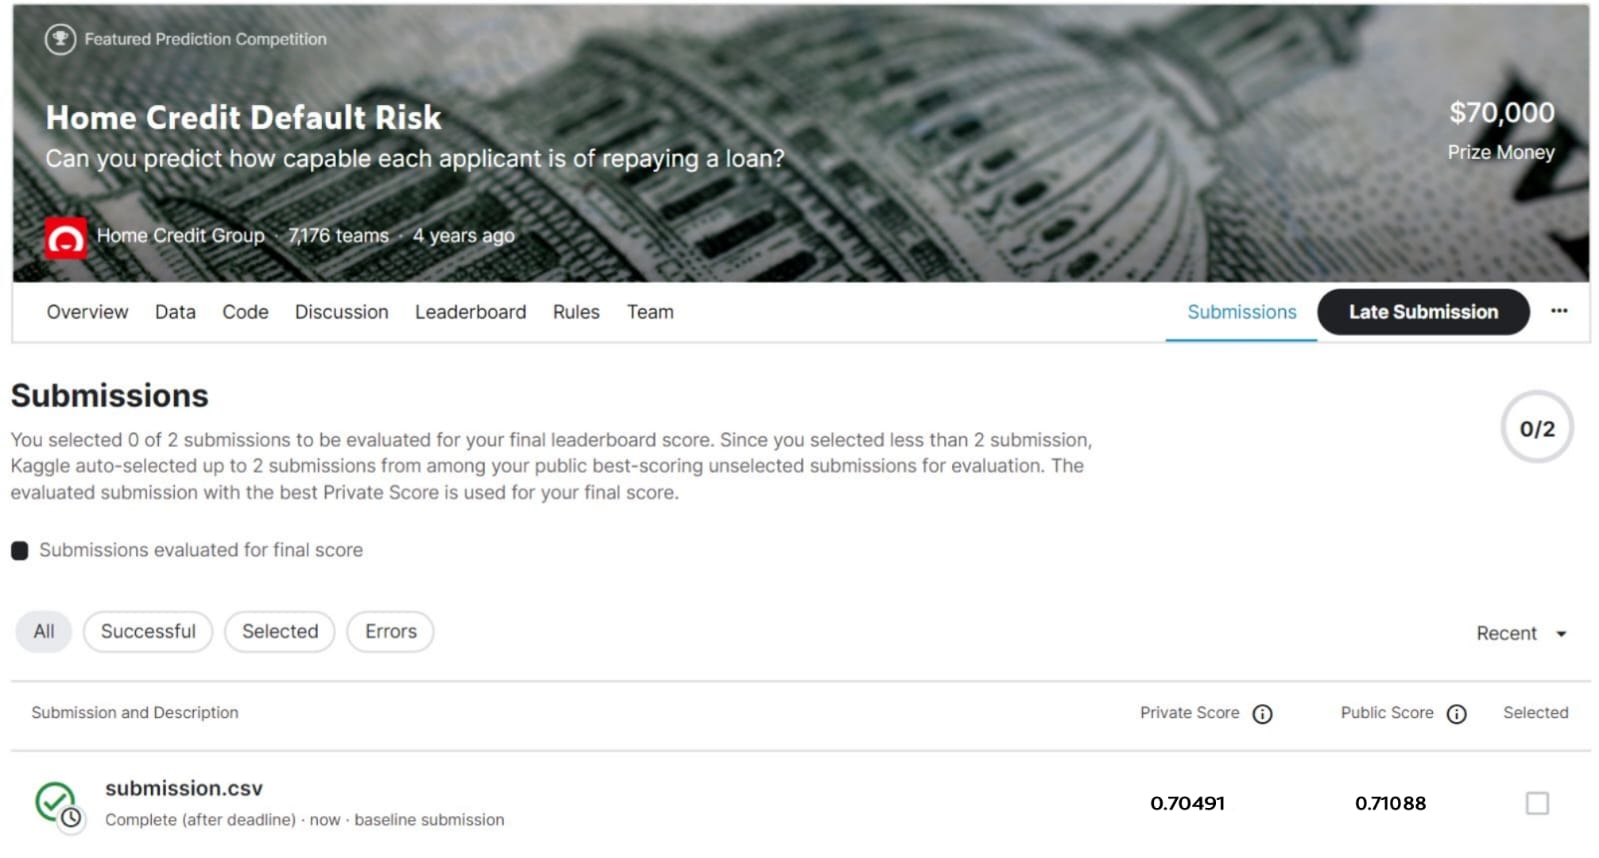

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections:

## Abstract
Home Credit Default Risk project aims to determine a client’s ability to repay a loan given a set of features in the dataset. To achieve this aim, we holistically addressed multiple aspects of the customer’s background apart from credit histories.

We started this project by performing initial data analysis and deciding on three baselines models: Logistic Regression, Naive Bayes Classifier and Random Forest Classifier. In the next phase we performed extensive EDA and found out the highly correlated features to run our baseline models. We observed that while Logistic Regression and Random Forest performed well with AUC score (Kaggle submission public score) of 0.73 and 0.72 respectively, Naive Bayes gave very poor accuracy due to underfitting and thus we discarded the model. Further in phase 3, we performed additional feature engineering to select the best features and used these features to tune our baseline models and find out the optimal parameters. We then performed GridSearch to further improve the accuracy of our models and observed that Logistic Regression gave a score of 0.74 on Kaggle Submission. We have tested the accuracy using the performance metrics which are ROC, AUC, Log Loss and F1 score and also the Kaggle submission score.

In this phase, we intended to implement Multilayer Perceptron architectures for our data and evaluate the performance based on the cross entropy loss function. We used the ReLU activation function along with Adam optimizer and performed for 1000 epochs with 4 hidden layers and 2 output features. We further showed the visualizations of our accuracy and loss on TensorBoard.We reached a test roc of 0.71 and training roc of 0.95 with training accuracy of 93.78% and Kaggle submission public score of 0.71

## Introduction
## Summary of previous phases 
1. In Phase 1,we performed initial analysis of the dataset and decided to use the three analytical models, namely: Random Forest Classifier, Logistic Regression and Naive Bayes Classifier.
2. In Phase 2 , we performed EDA to select the important features and created the baseline pipeline and measured the accuracies of our models. 
3. In Phase 3, we performed hyperparameter tuning to select the optimal parameters for our logistic regression and random forest models and applied K-Fold cross validation and GridSearchCV.


## Phase 2 Feature Engineering and transformers
We performed feature engineering on all datasets and merged with application train and application test. For feature selection from application train, we selected top 47 features out of which 31 are numeric and 16 are categorical based on the correlation with target variable. We used pipelines to avoid the data leakage.



## Phase 3 Feature Engineering, Hyperparameter Tuning and GridSearch 
Feature Engineering: We had a total of 228 features after performing feature engineering but to make the models faster and to avoid run time issues, we used features having more than 3% with the TARGET that gave us a total of 121 input features.

Hyperparameter Tuning: We performed hyperparameter tuning to find the optimal setting for our models using paramaters like C, penalty and solver

Gridsearch and K-fold Cross Validation: We used GridSearchCV to get the best parameters and features of the model by just mentioning the model which we want to use, the input parameters for the model and the accuracy that we want. For logistic regression, we created a function for GridSearchCV with 100 iterations for 5 fold cross-validations for the hyperparameters. We did the same for our Random Forest Classifier model with 5 fold cross-validations for the hyperparameters.


## Phase 4


## Tasks to be tackled
1. Implement MultiLayer Perceptron model
2. Perform experimentation using the optimizer functions and activation functions
3. Apply the above functions with appropriate number of hidden layers and neurons and evaluate the highest accuracy model.

## Approach
1. We fed the feature engineered data to our MLP model on PyTorch
2. We built our neural network consisting of 121 input features, 4 hidden layers with  128,64,32,16 neurons in each layer respectively and 2 output features.
3. We used Relu as the activation function and the Adam Optimizer for modeling.
4. Further we evaluated our model using Cross Entropy Loss Function.
5. We trained out model for 1000 epochs and applied a  softmax function on the final predictions to get the final answer and performed visualizations on TensorBoard.


## Pipelines

The pipeline for this phase included the following stages:

1. Separating the numerical and categorical features.
2. Building the parent pipeline by imputing the numerical and categorical features.
3. Performing Feature Engineering.
4. Using this feature engineered data to feed to our MLP model on PyTorch
5. Performing visualizations on Tensorboard 

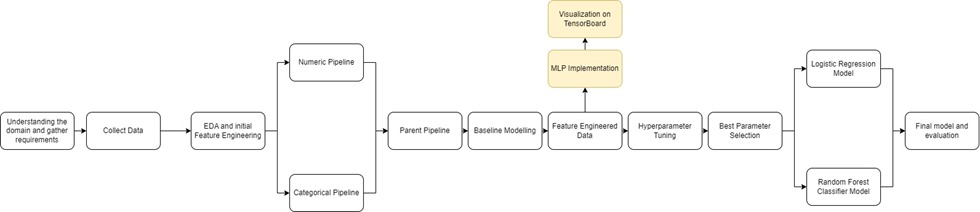

## Leakage 

Leakage in terms of data is an occurence when data present during training is not present at time of testing. Since there were a lot of NaN values in our dataset, the possibility of leakage occuring was very high, however, the pipelines we created and feature engineering that we performed handled the missing values appropriately thereby uniformly setting the data type across the tables and making data available.

Cardinal sins in ML that we found were most common to our project and approach were:
1. Poor data quality - We found that the datasets had a lot of missing values which had the potential to break our model however, we dealt with it appropriately during feature engineering
2. Improper split of data and overfitting - We found that places where the train and test data was not split correctly had a potential to report wrong values at the time of evluation of our model. We handled this by properly splitting our data and training it for best fit.
3. Limiting to only one scoring metric - The most common problem which causes model evaluation suffers is due to only one scoring metric. We utilized ROC, AUC, Log Loss and F1 score to make sure not to insufficiently evaluate our models.
4. Result overinterpretation - We tabulated our results and did not overinterpret them 
5. Confusion due to cross-validation: Using a large number of cross-validations leads to confusion which we did not encounter as we kept the cross-validation to a less number ie. 5.

Hence, we were able to handle/avoid any cardinal sins of machine learning 



## Experimental Results
## Without hyperparameter tuning
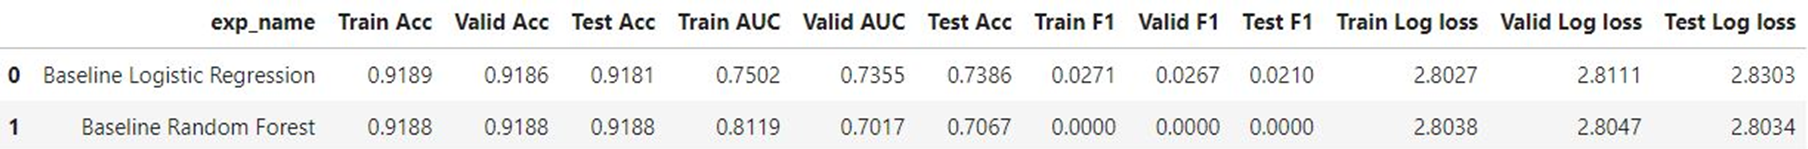

## With hyperparameter tuning
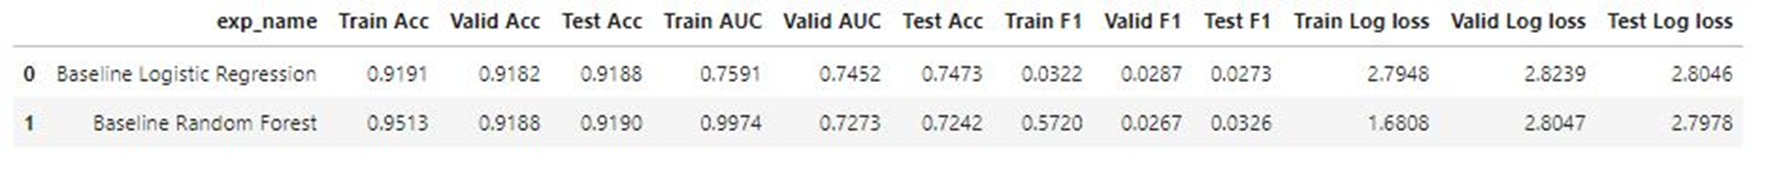

## With MLP and neural network
### training accuracy
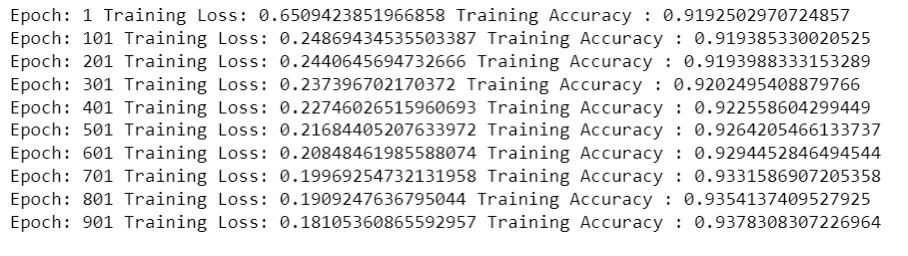  
### training ROC curve
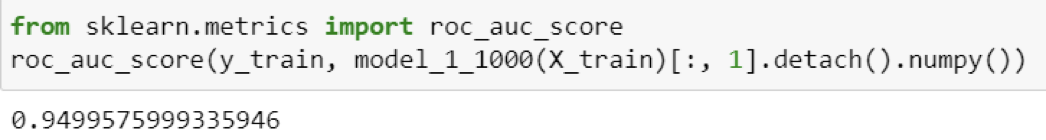  
### Training ROC score
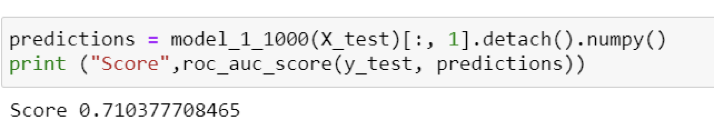  

## Results and Discussion
In this phase, we built our neural network used Relu as the activation function and the Adam Optimizer for modeling and further evaluated our model using Cross Entropy Loss Function. We observed that our MLP implementation model gave a training accuracy of 93.78% and a test roc score of 0.71 and training roc score of 0.9499 with Kaggle submission score of 0.71.

Comparing the results of the previous phases we observed that in phase 2, we found that Logistic Regression gave better performance with an accuracy of 91.81% and Kaggle submission accuracy of 73.7% followed by Random Forest Classifier with an accuracy 91.8%. In phase 3, we noted that the training and testing accuracies for random forest were 95% and 92% respectively which were greater than logistic regression having training accuracy of 92% and testing accuracy of 92%, however the AUC scores were higher for logistic regression with 0.74 as the score and only 0.72 for random forest. As compared to the phase, the accuracy achieved in phase 2 for both Logistic Regression and Random Forest were improved.The performance metrics we implemented to analyze the accuracy pf the algorithms were AUC score, ROC score, F1 Score and Log Loss function.


## Gap Analysis 
For phase 4, we observed that our MLP pipeline gave a training accuracy of 93.78% and a test roc score of 0.71 and training roc score of 0.9499 and AUC score of 0.71. This was due to our utilization of 4 hidden layers with 128, 64,32,16 neurons accompanied with a dropout layer of 0.1 and 2 output neurons and Adam Optimizer model. We further observed that limiting the epochs to 1000 was optimal as after 1000 epochs there were not much increase in the accuracy. However, our best pipeline for the overall project was Logistic Regression with training accuracy of 92% and AUC score of 0.75. This was majorly due to the following reasons:
1. We checked the correlation of the initial features and found the ones which were more relevant.
2. We then created new features using these highly correlated features 
3. We further checked the correlationg of these new features with the TARGET to select the best features.
4. We additionally experimented with a lot of parameters during the hyperparameter tuning to arrive at the optimal parameters for our models.
5. Finally, the pipeline accuracies we got we better from our own initial pipeline and others as well due to peforming 5-fold cross valudation along with GrisdSearchCV.




## Conclusion
The goal of this project is to determine client’s ability to repay a loan given a set of features in our dataset. 

In phase 2, we used EDA to generate insights into our datasets and segregate the important features to implement the baseline pipelines. We observed that amongst the three analytical methods used, lowest accuracy was given by the Naïve Bayes Classifier due to underfitting and thus we will not be considering it going forward. We found that Logistic Regression gave better performance with an accuracy of 91.81% and Kaggle submission accuracy of 73.7% followed by Random Forest Classifier with an accuracy 91.8%. 

In this phase 3 of the project, We created our own features, merged the data and selected the highly correlated features which contributed towards the prediction. We performed hyperparameter tuning for our models using K-Fold cross validation and GridSearchCV. By comparing the results of the performance metrics for logistic regression and random forest models, we were able to get better understanding of the data and found that the training and testing accuracies for random forest were 95% and 92% respectively which were greater than logistic regression having training accuracy of 92% and testing accuracy of 92%, however the AUC scores were higher for logistic regression with 0.74 as the score and only 0.72 for random forest. 

In this phase, we built our neural network consisting of 121 input features, 4 hidden layers with  128,64,32,16 neurons in each layer respectively and 2 output features. We used Relu as the activation function and the Adam Optimizer for modeling and further evaluated our model using Cross Entropy Loss Function. We trained out model for 1000 epochs and applied a  softmax function on the final predictions to get the final answer and performed visualizations on TensorBoard. We observed that MLP model gave a training accuracy of 93.78% , test roc score of 0.71 and Kaggle submission public score of 0.71. In comparison with Logistic Regression having an AUC score of 0.74 and Random Forest having an AUC score of 0.72, our MLP model gave a lesser score. Thus, we can conclude the non-deep learning models implemented in the previous phases performed better than the MLP model implemented with Logistic Regression giving highest AUC score of 0.74.
Further this model can be improved by using embeddings in deep learning models or advanced classification models like boosting models.


Our plan for the next phase is to experiment on Multilayer Perceptron architectures for better prediction results in PyTorch. 
We plan to train our model using Pytorch Lighting and as a stretch goal, we aim to build a multi-task loss function in PyTorch.


## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

We submitted the scores for Logistic Regression as well as Random Forest Classifier on Kaggle with Logistic Regression giving the AUC score as 0.74 and Random Forest giving score of 0.72.
On the basis of which we could conclude that Logistic Regression has better accuracy.

## Phase 4 Kaggle Submission

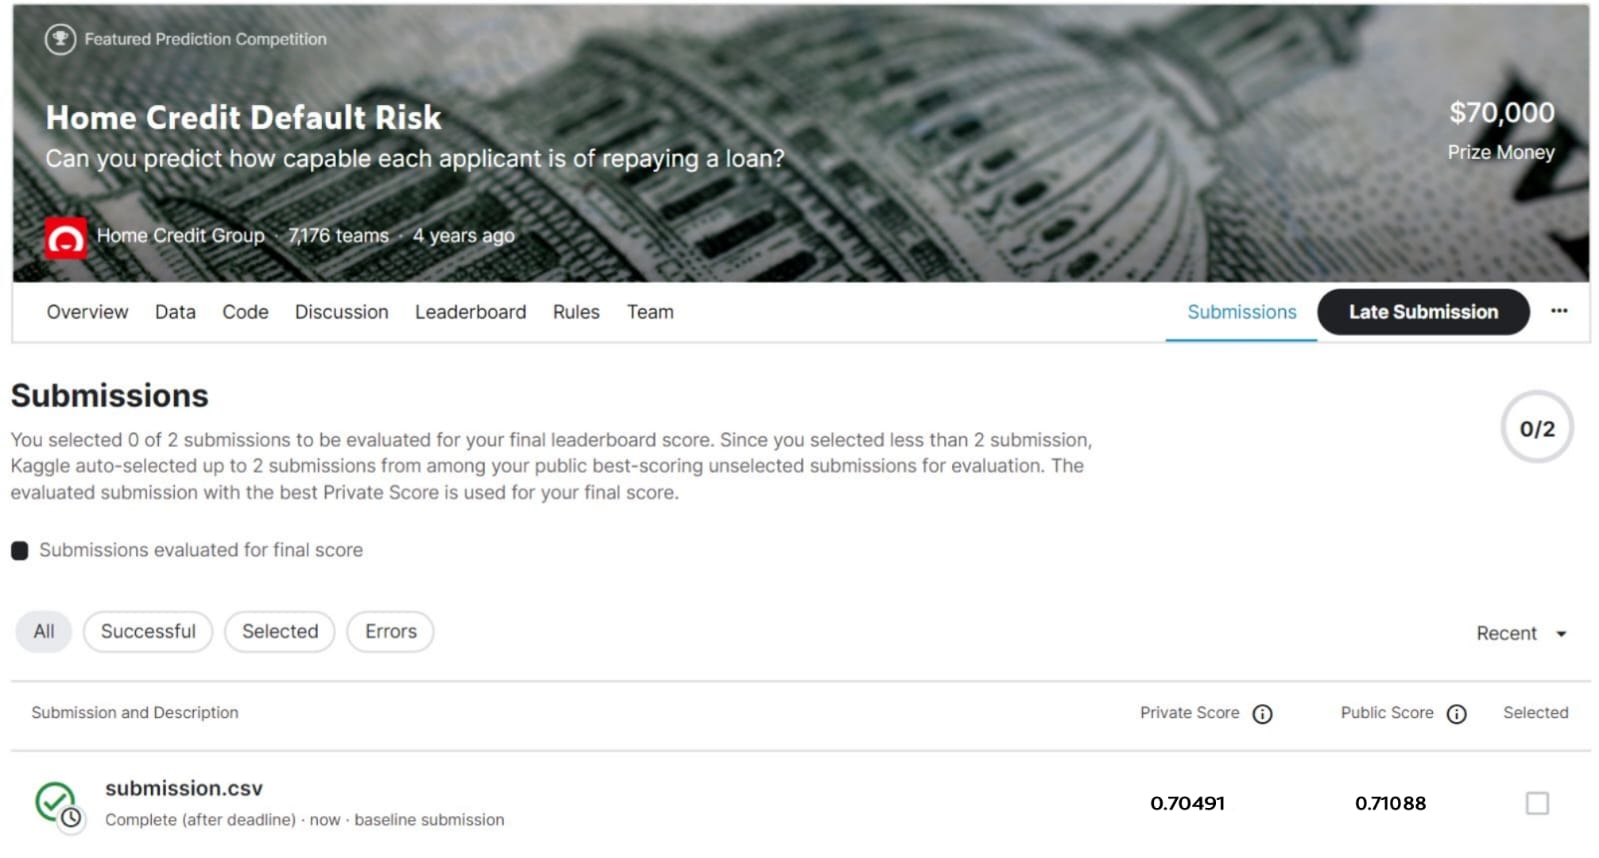

## Phase 3 Kaggle Submission
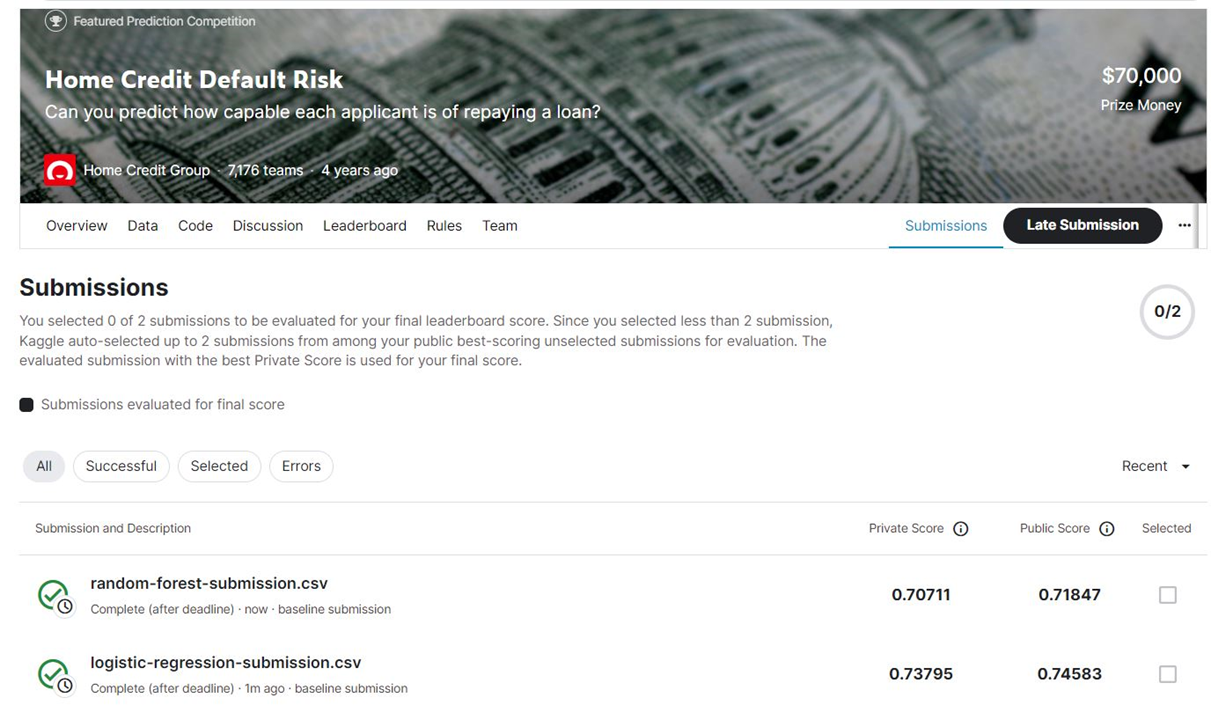




Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


##### https://www.geeksforgeeks.org/plot-multiple-columns-of-pandas-dataframe-on-bar-chart-with-matplotlib/

##### https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_algorithms_performance_metrics.htm

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/